# 时间序列模型

## Holt-Winters季节性预测模型

In [1]:
import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from utils.get_stability import test_stationarity
import sys
from dateutil.relativedelta import relativedelta

In [2]:

plt.rcParams['font.sans-serif'] = ['SF Mono']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 360  #图片像素
plt.rcParams['figure.dpi'] = 360  #分辨率

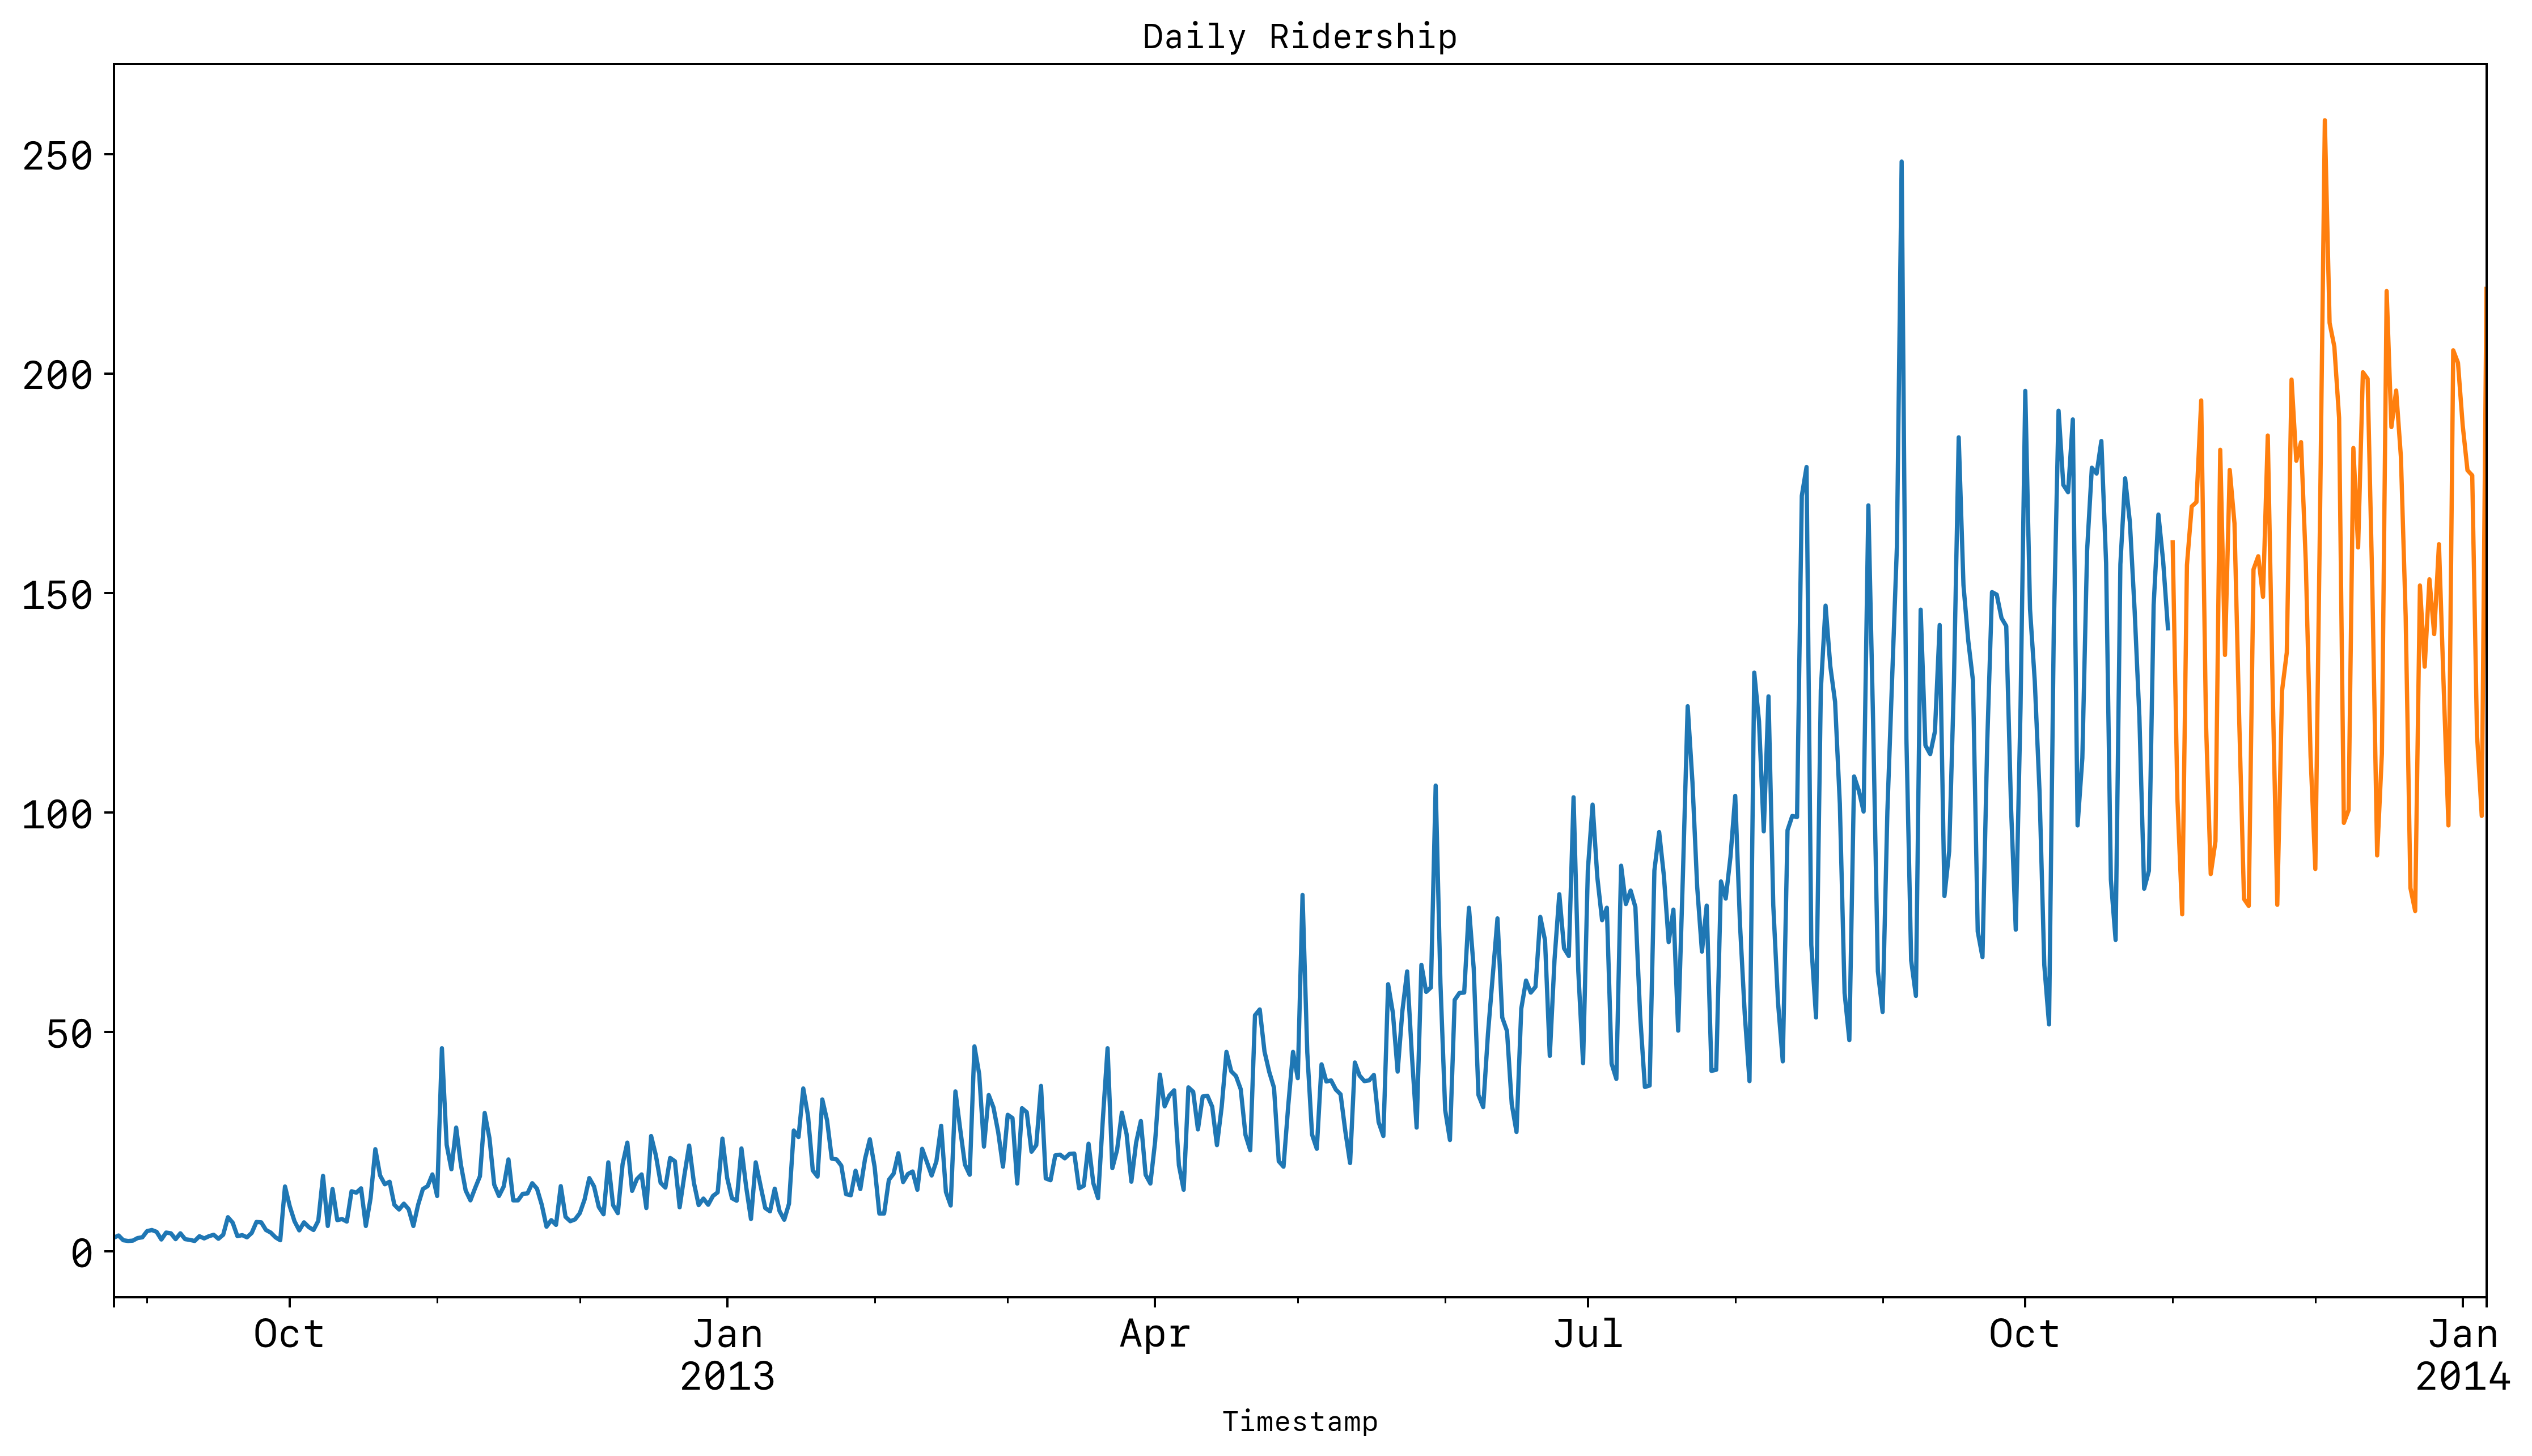

In [3]:
df = pd.read_csv('../data/jet_rail.csv')
df.head()

train = df[0:10392]
test = df[10392:12000]
df['Timestamp'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.index = df['Timestamp']
df = df.resample('D').mean()
train['Timestamp'] = pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M')
train.index = train['Timestamp']
train = train.resample('D').mean()
test['Timestamp'] = pd.to_datetime(test['Datetime'], format='%d-%m-%Y %H:%M')
test.index = test['Timestamp']
test = test.resample('D').mean()
train.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14)
plt.show()

/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


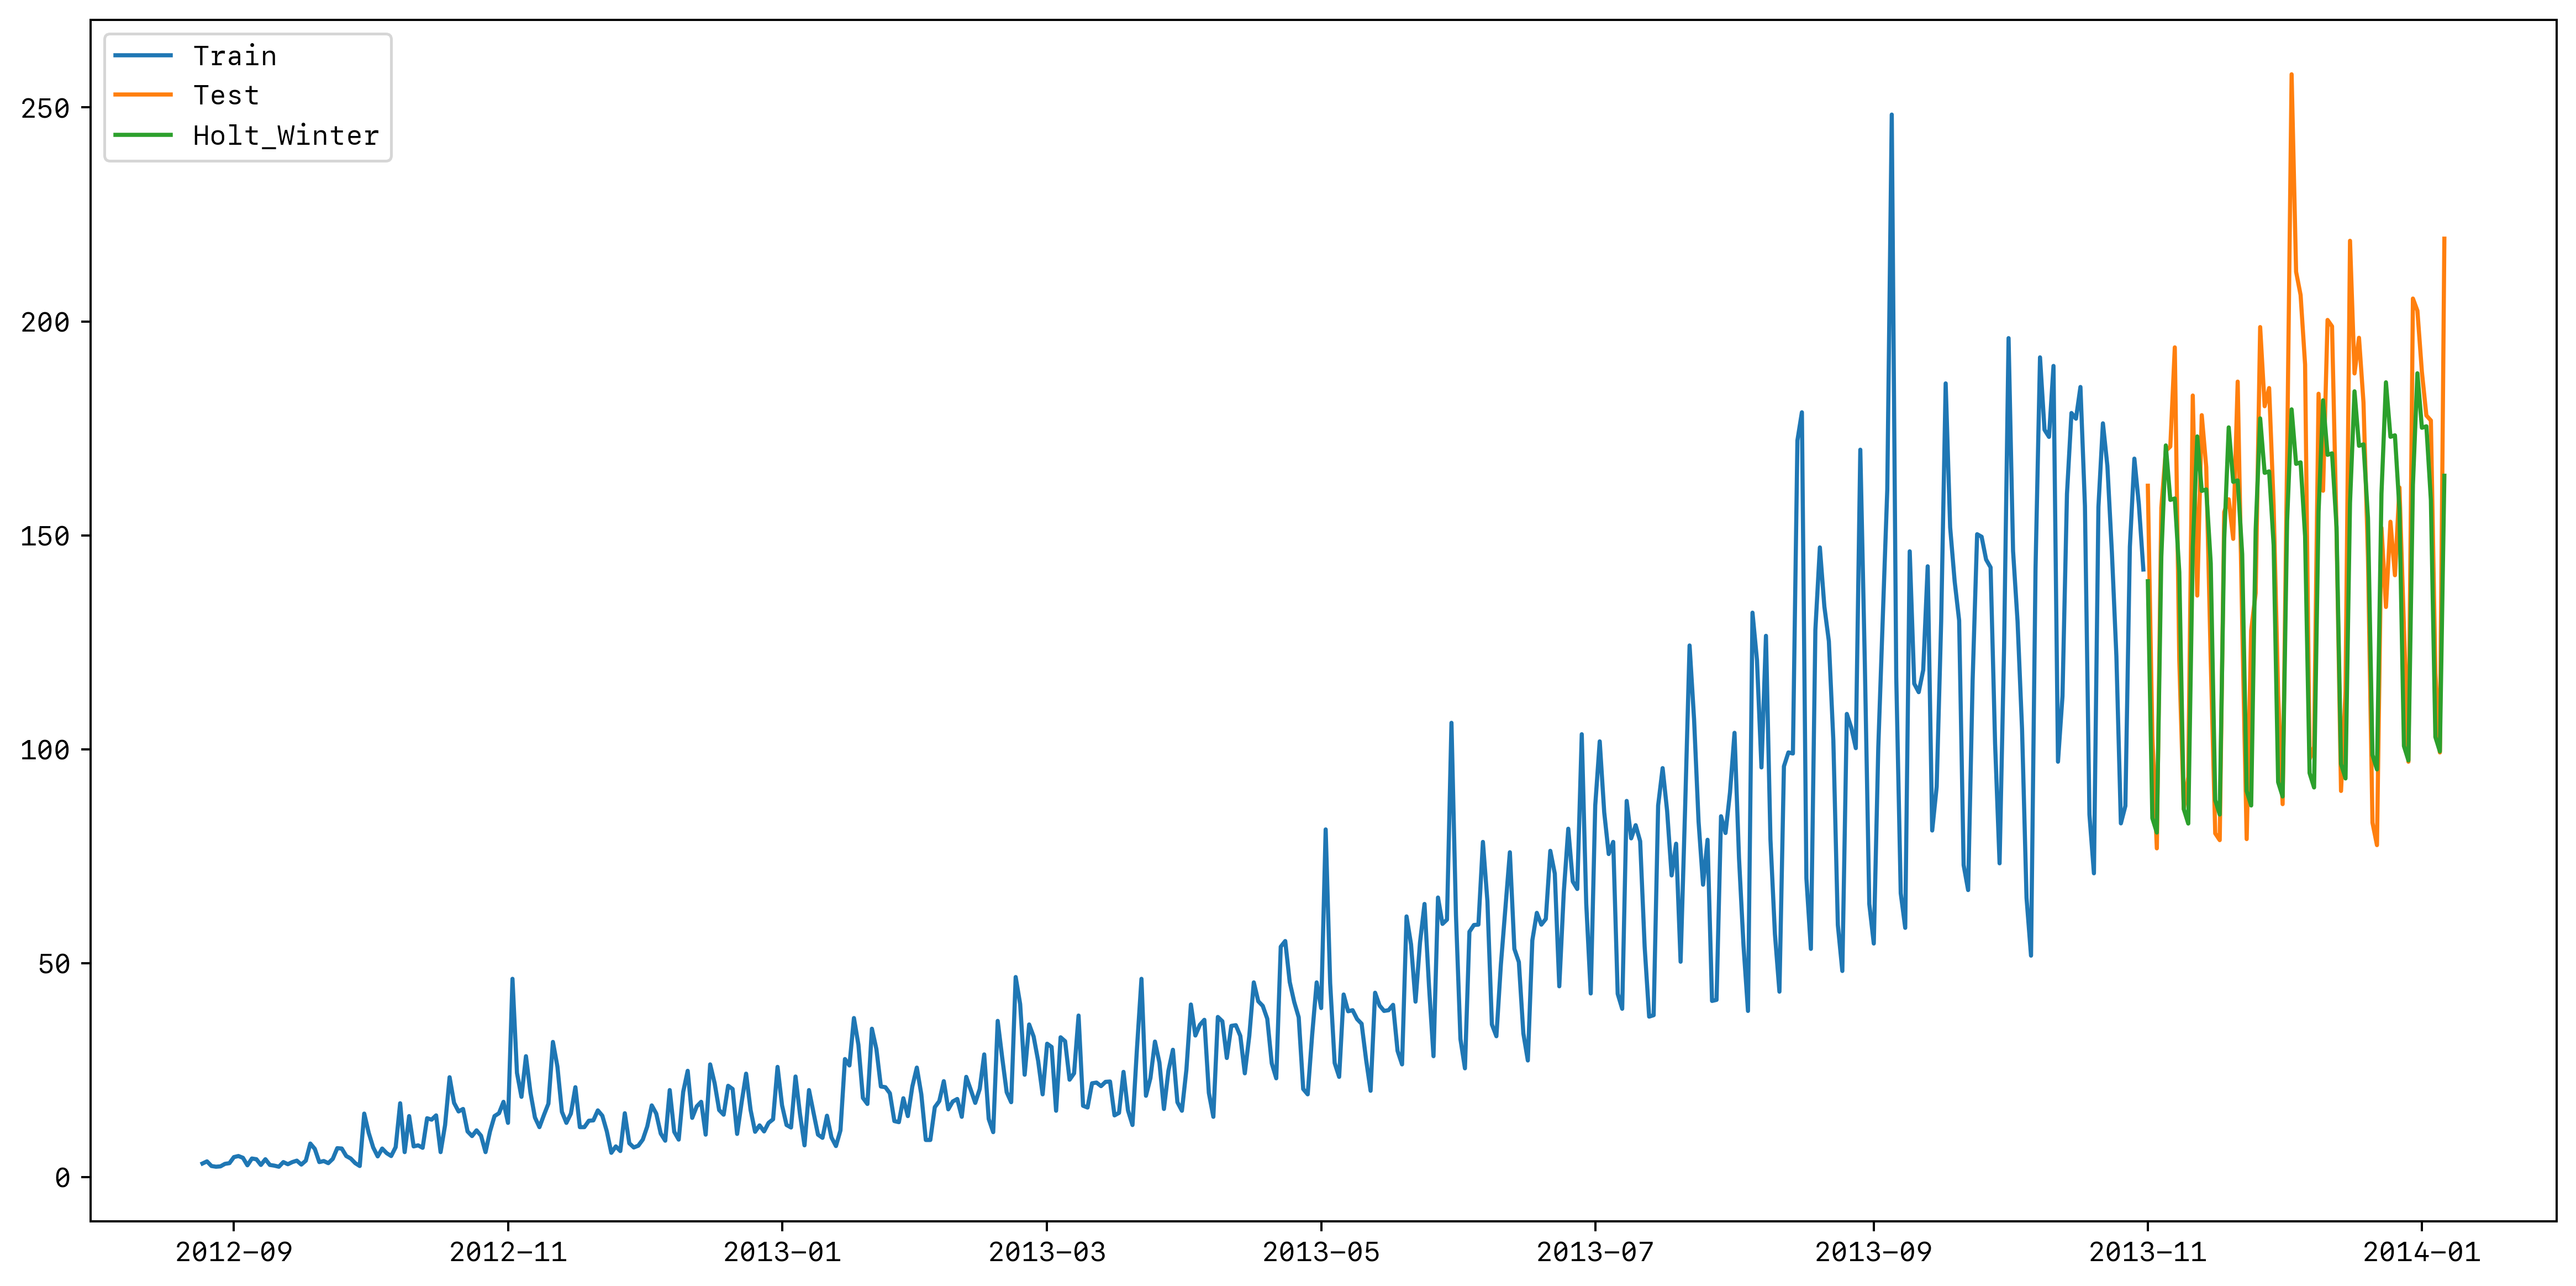

25.260855789326342


In [4]:
y_hat_avg = test.copy()
# seasonal_periods=7 作为每周重复数据
fit1 = ExponentialSmoothing(np.asarray(train['Count']), seasonal_periods=7, trend='add', seasonal='add', ).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['Holt_Winter']))
print(rms)

## 自回归移动平均模型（ARIMA）

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07269D+00    |proj g|=  4.57263D-02


 This problem is unconstrained.



At iterate    5    f=  4.04597D+00    |proj g|=  2.30548D-02

At iterate   10    f=  3.98051D+00    |proj g|=  2.91988D-02

At iterate   15    f=  3.97898D+00    |proj g|=  4.51612D-04

At iterate   20    f=  3.97893D+00    |proj g|=  1.09476D-02

At iterate   25    f=  3.97785D+00    |proj g|=  1.60864D-02

At iterate   30    f=  3.97543D+00    |proj g|=  3.26105D-02

At iterate   35    f=  3.97078D+00    |proj g|=  2.23281D-02

At iterate   40    f=  3.96862D+00    |proj g|=  1.44549D-02

At iterate   45    f=  3.96777D+00    |proj g|=  3.31987D-03

At iterate   50    f=  3.96770D+00    |proj g|=  2.82131D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


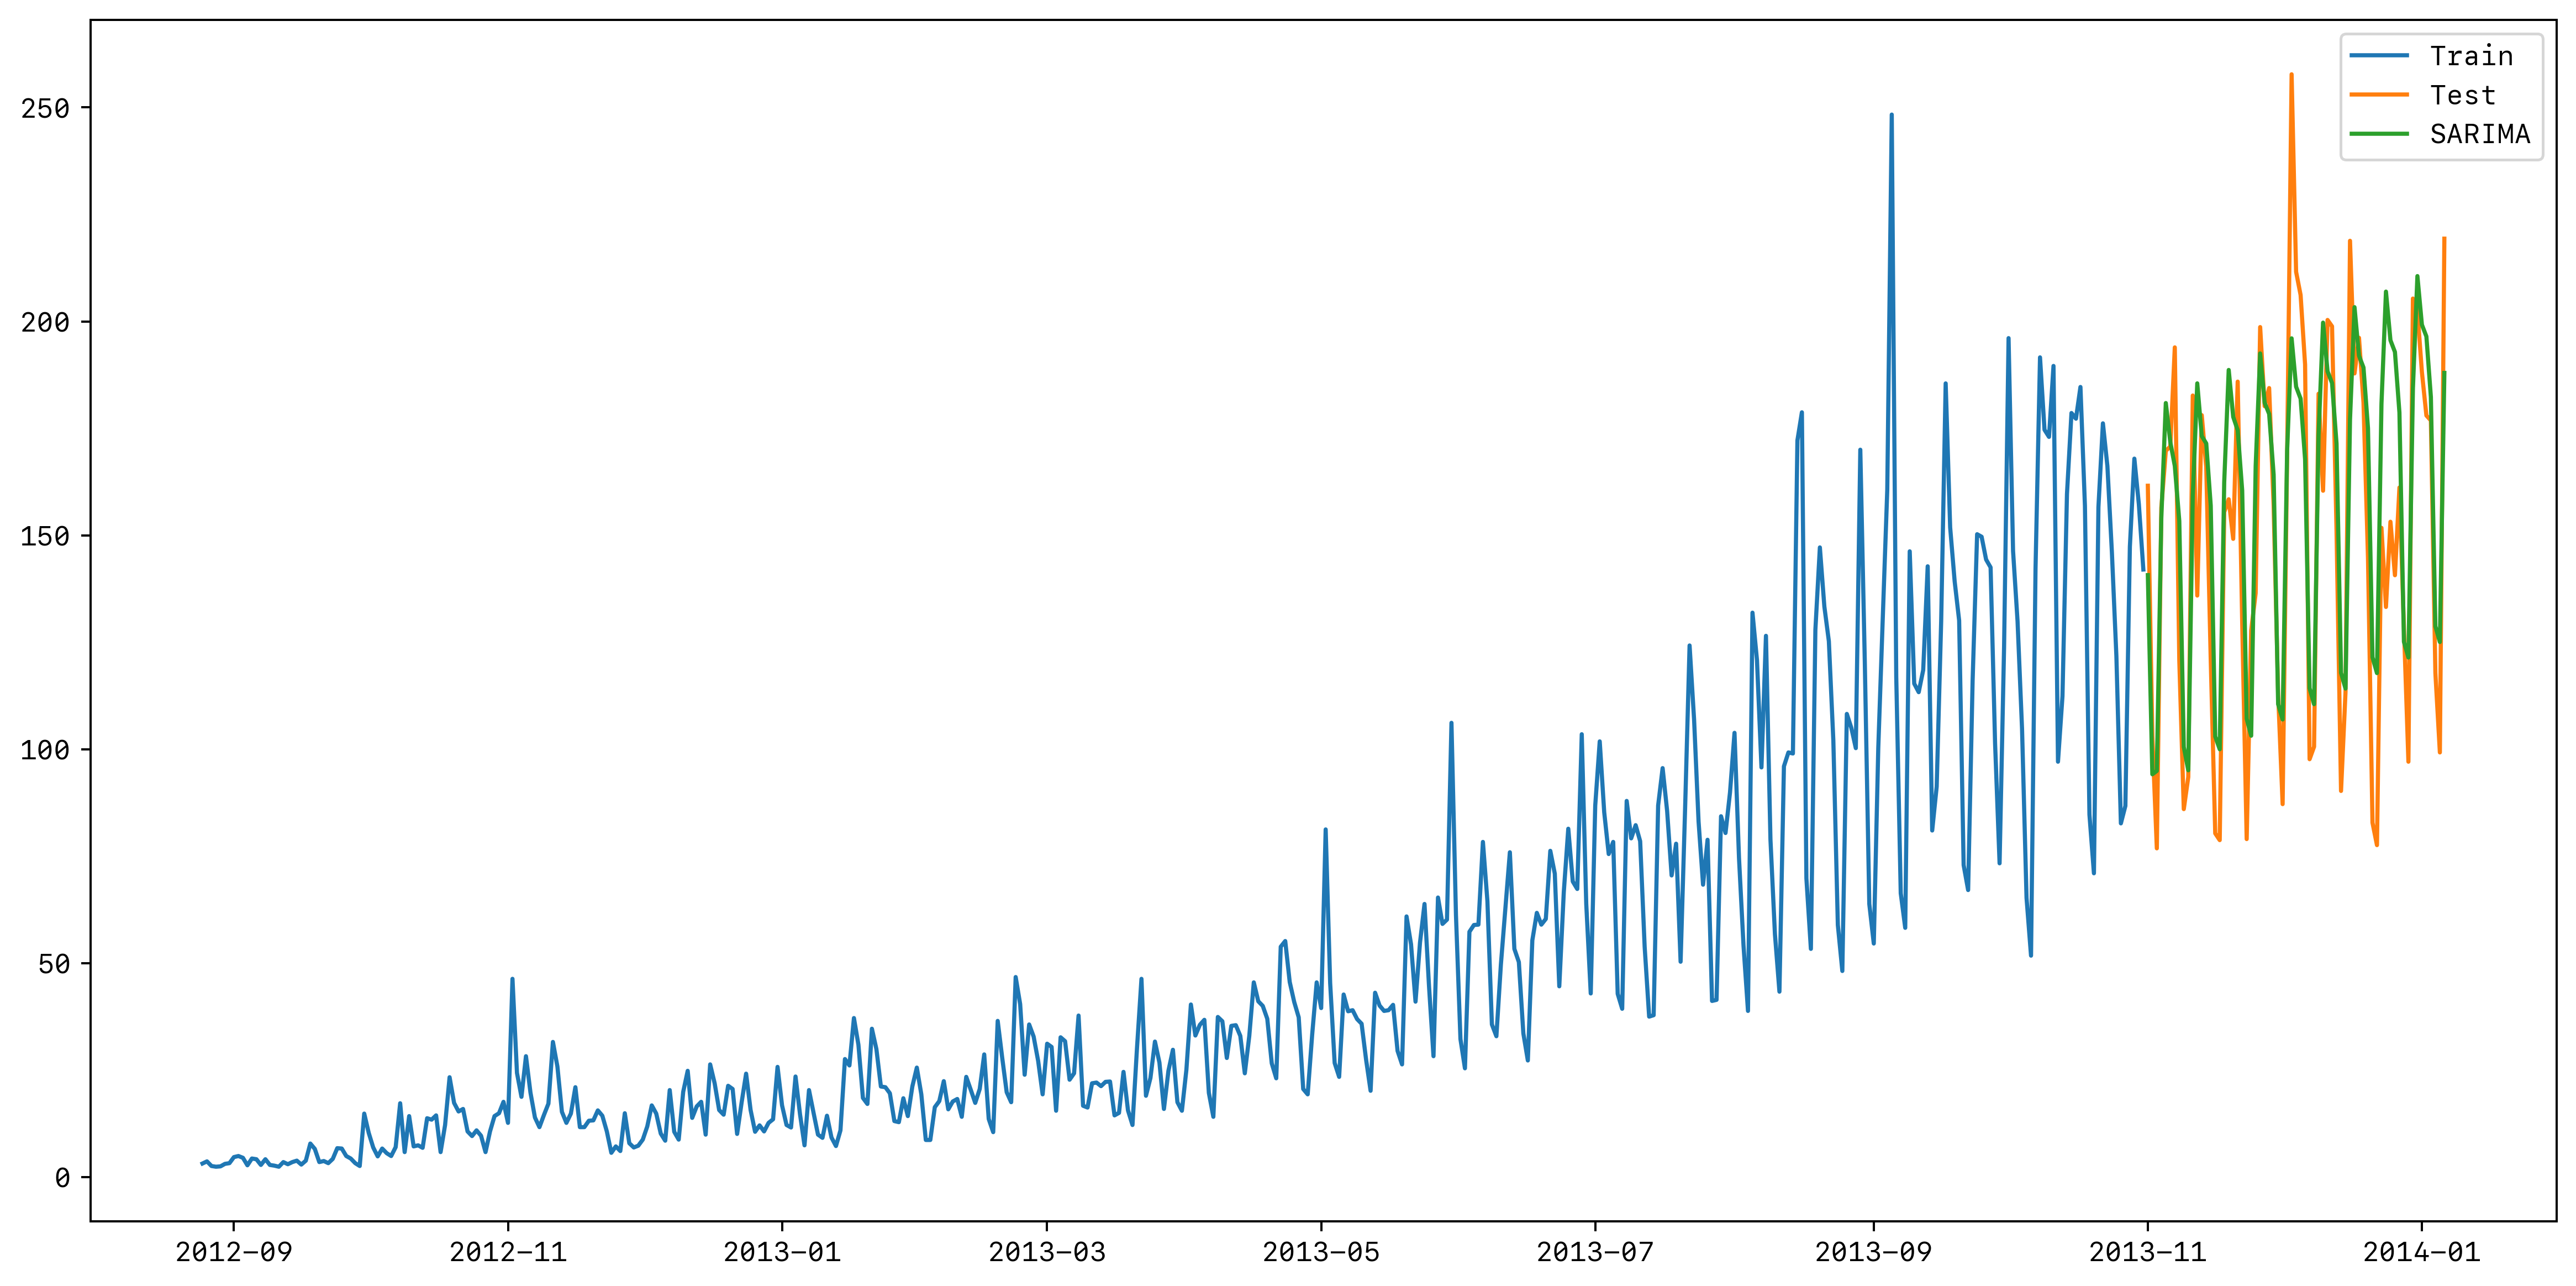

25.537797853375586


In [5]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4), seasonal_order=(0, 1, 1, 7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2014-01-06", dynamic=True)
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['SARIMA']))
print(rms)

## 波特兰公交客运量预测


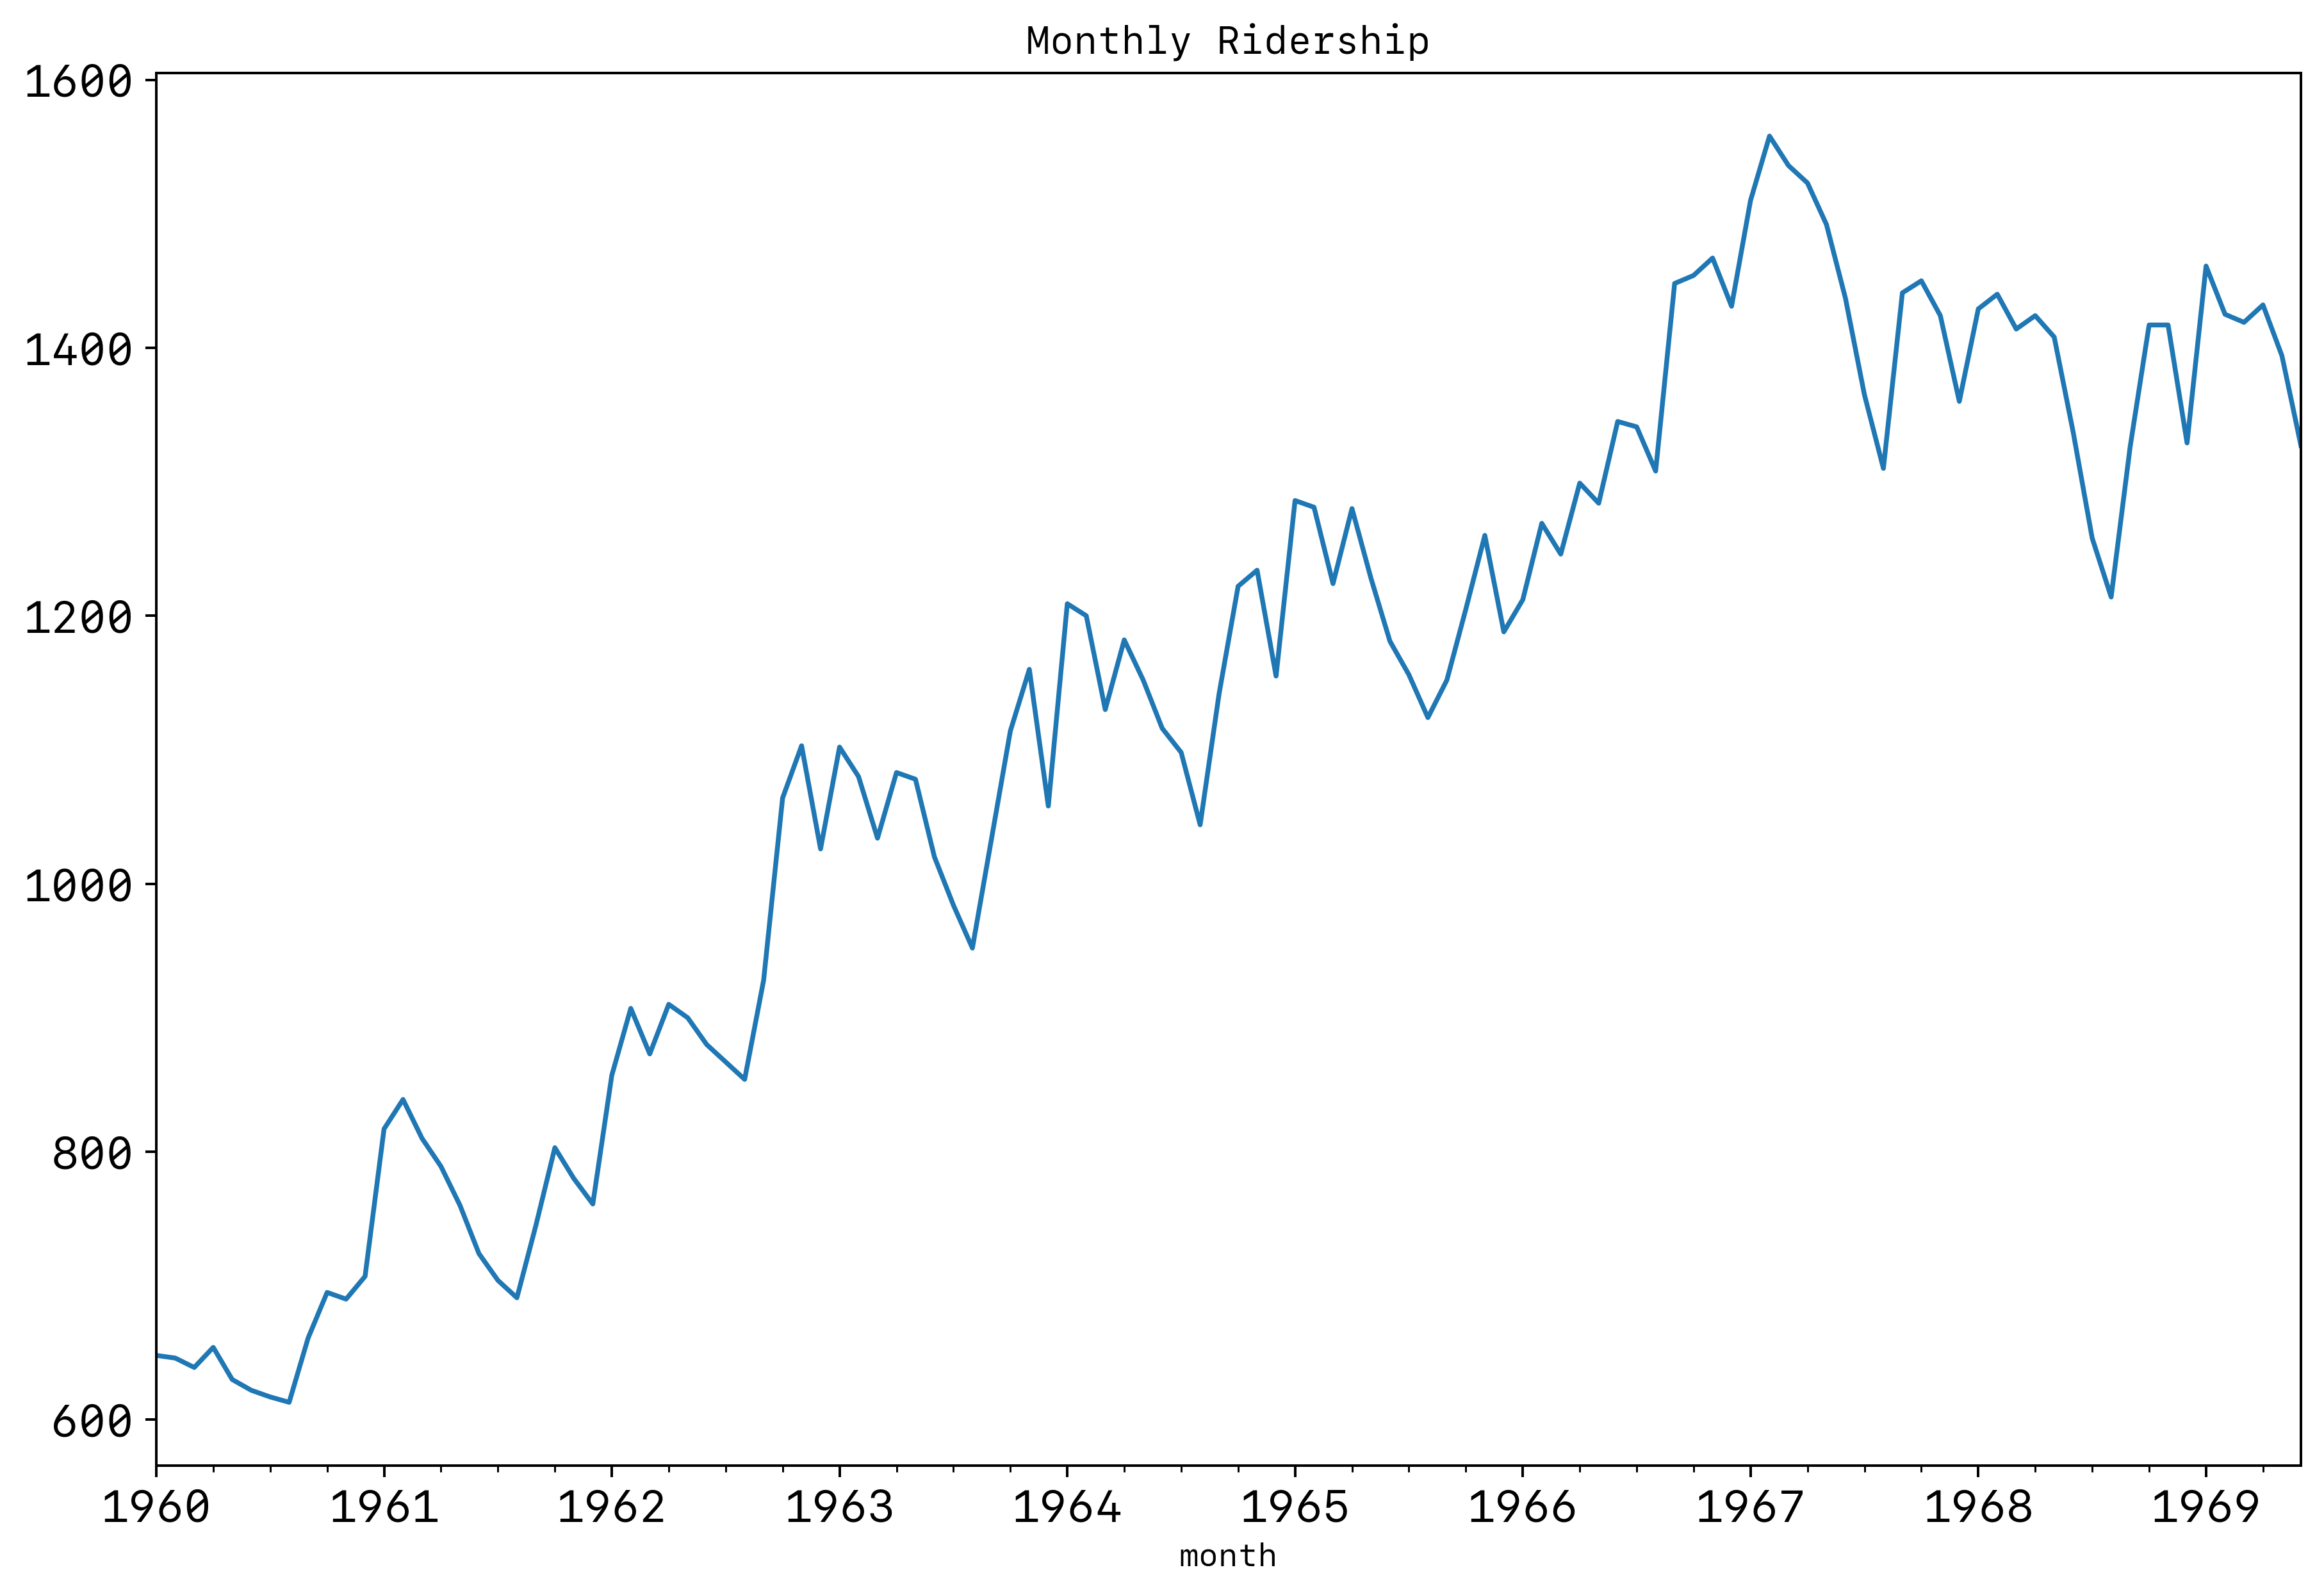

In [6]:
df = pd.read_csv('../data/portland-Oregon-average-monthly.csv', parse_dates=['month'], index_col='month')
df['riders'].plot(figsize=(12, 8), title='Monthly Ridership', fontsize=14)
plt.show()

/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 2160x1440 with 0 Axes>

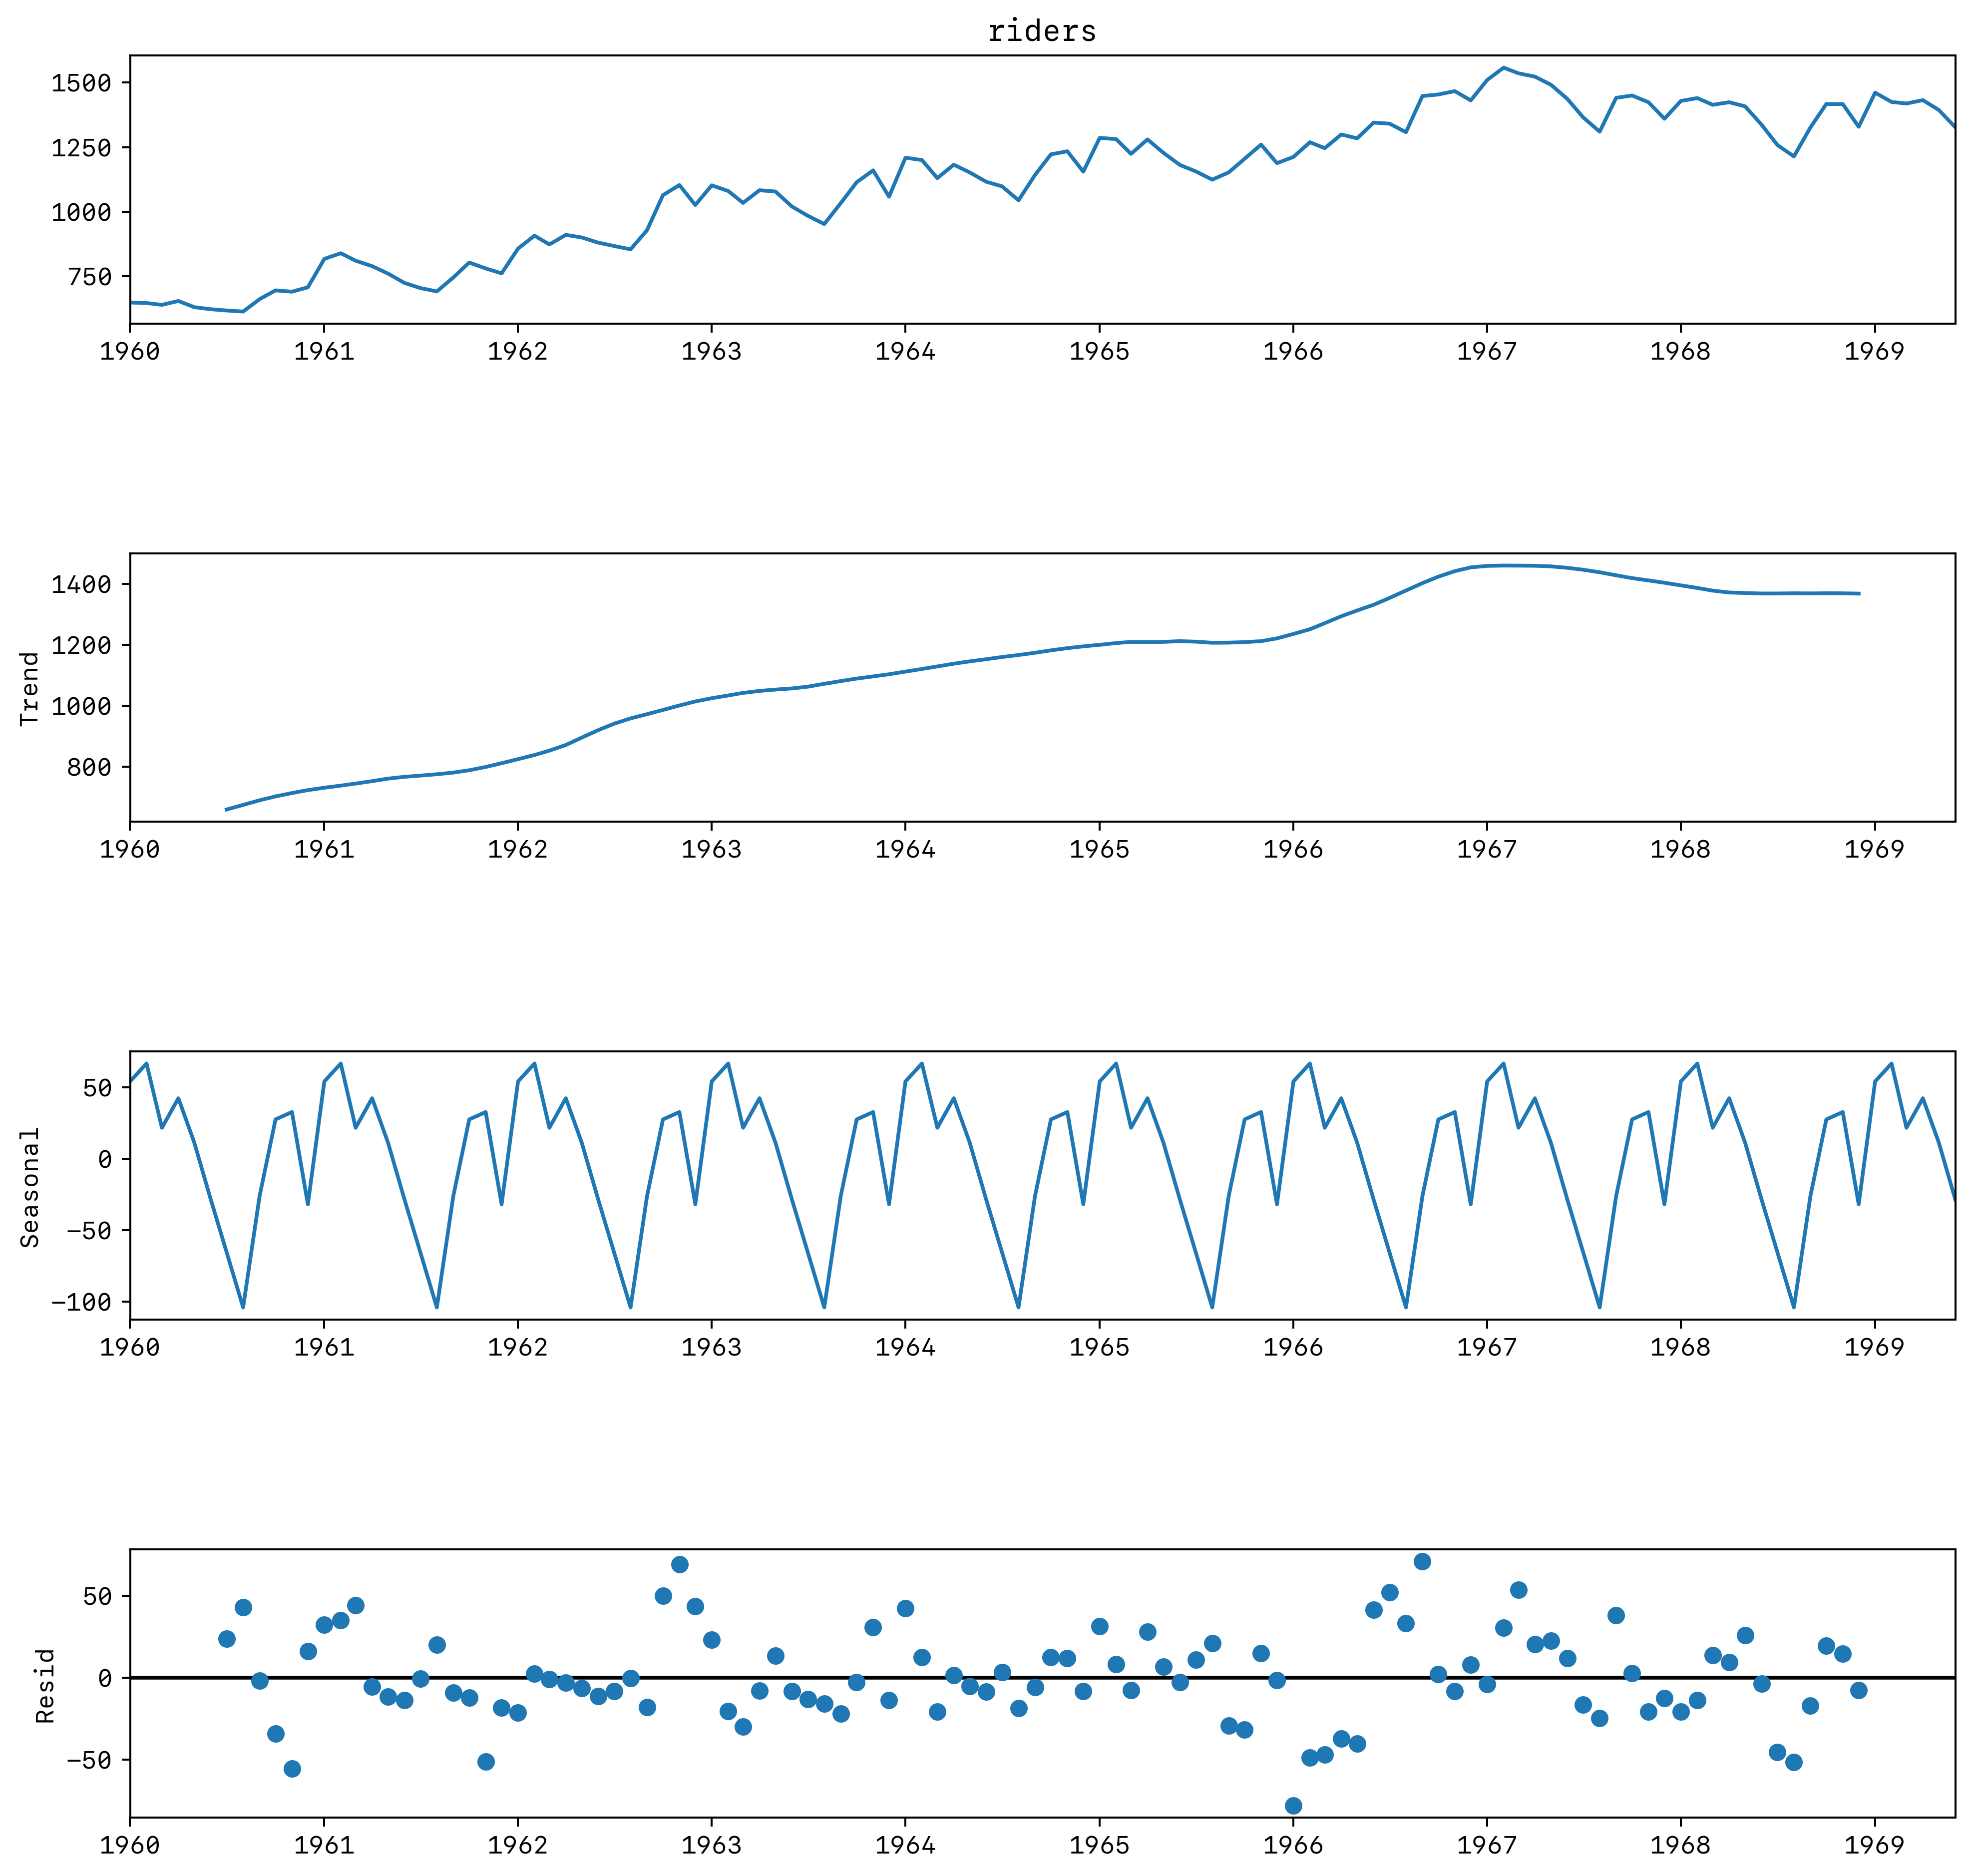

In [7]:
decomposition = seasonal_decompose(df['riders'], freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 12)

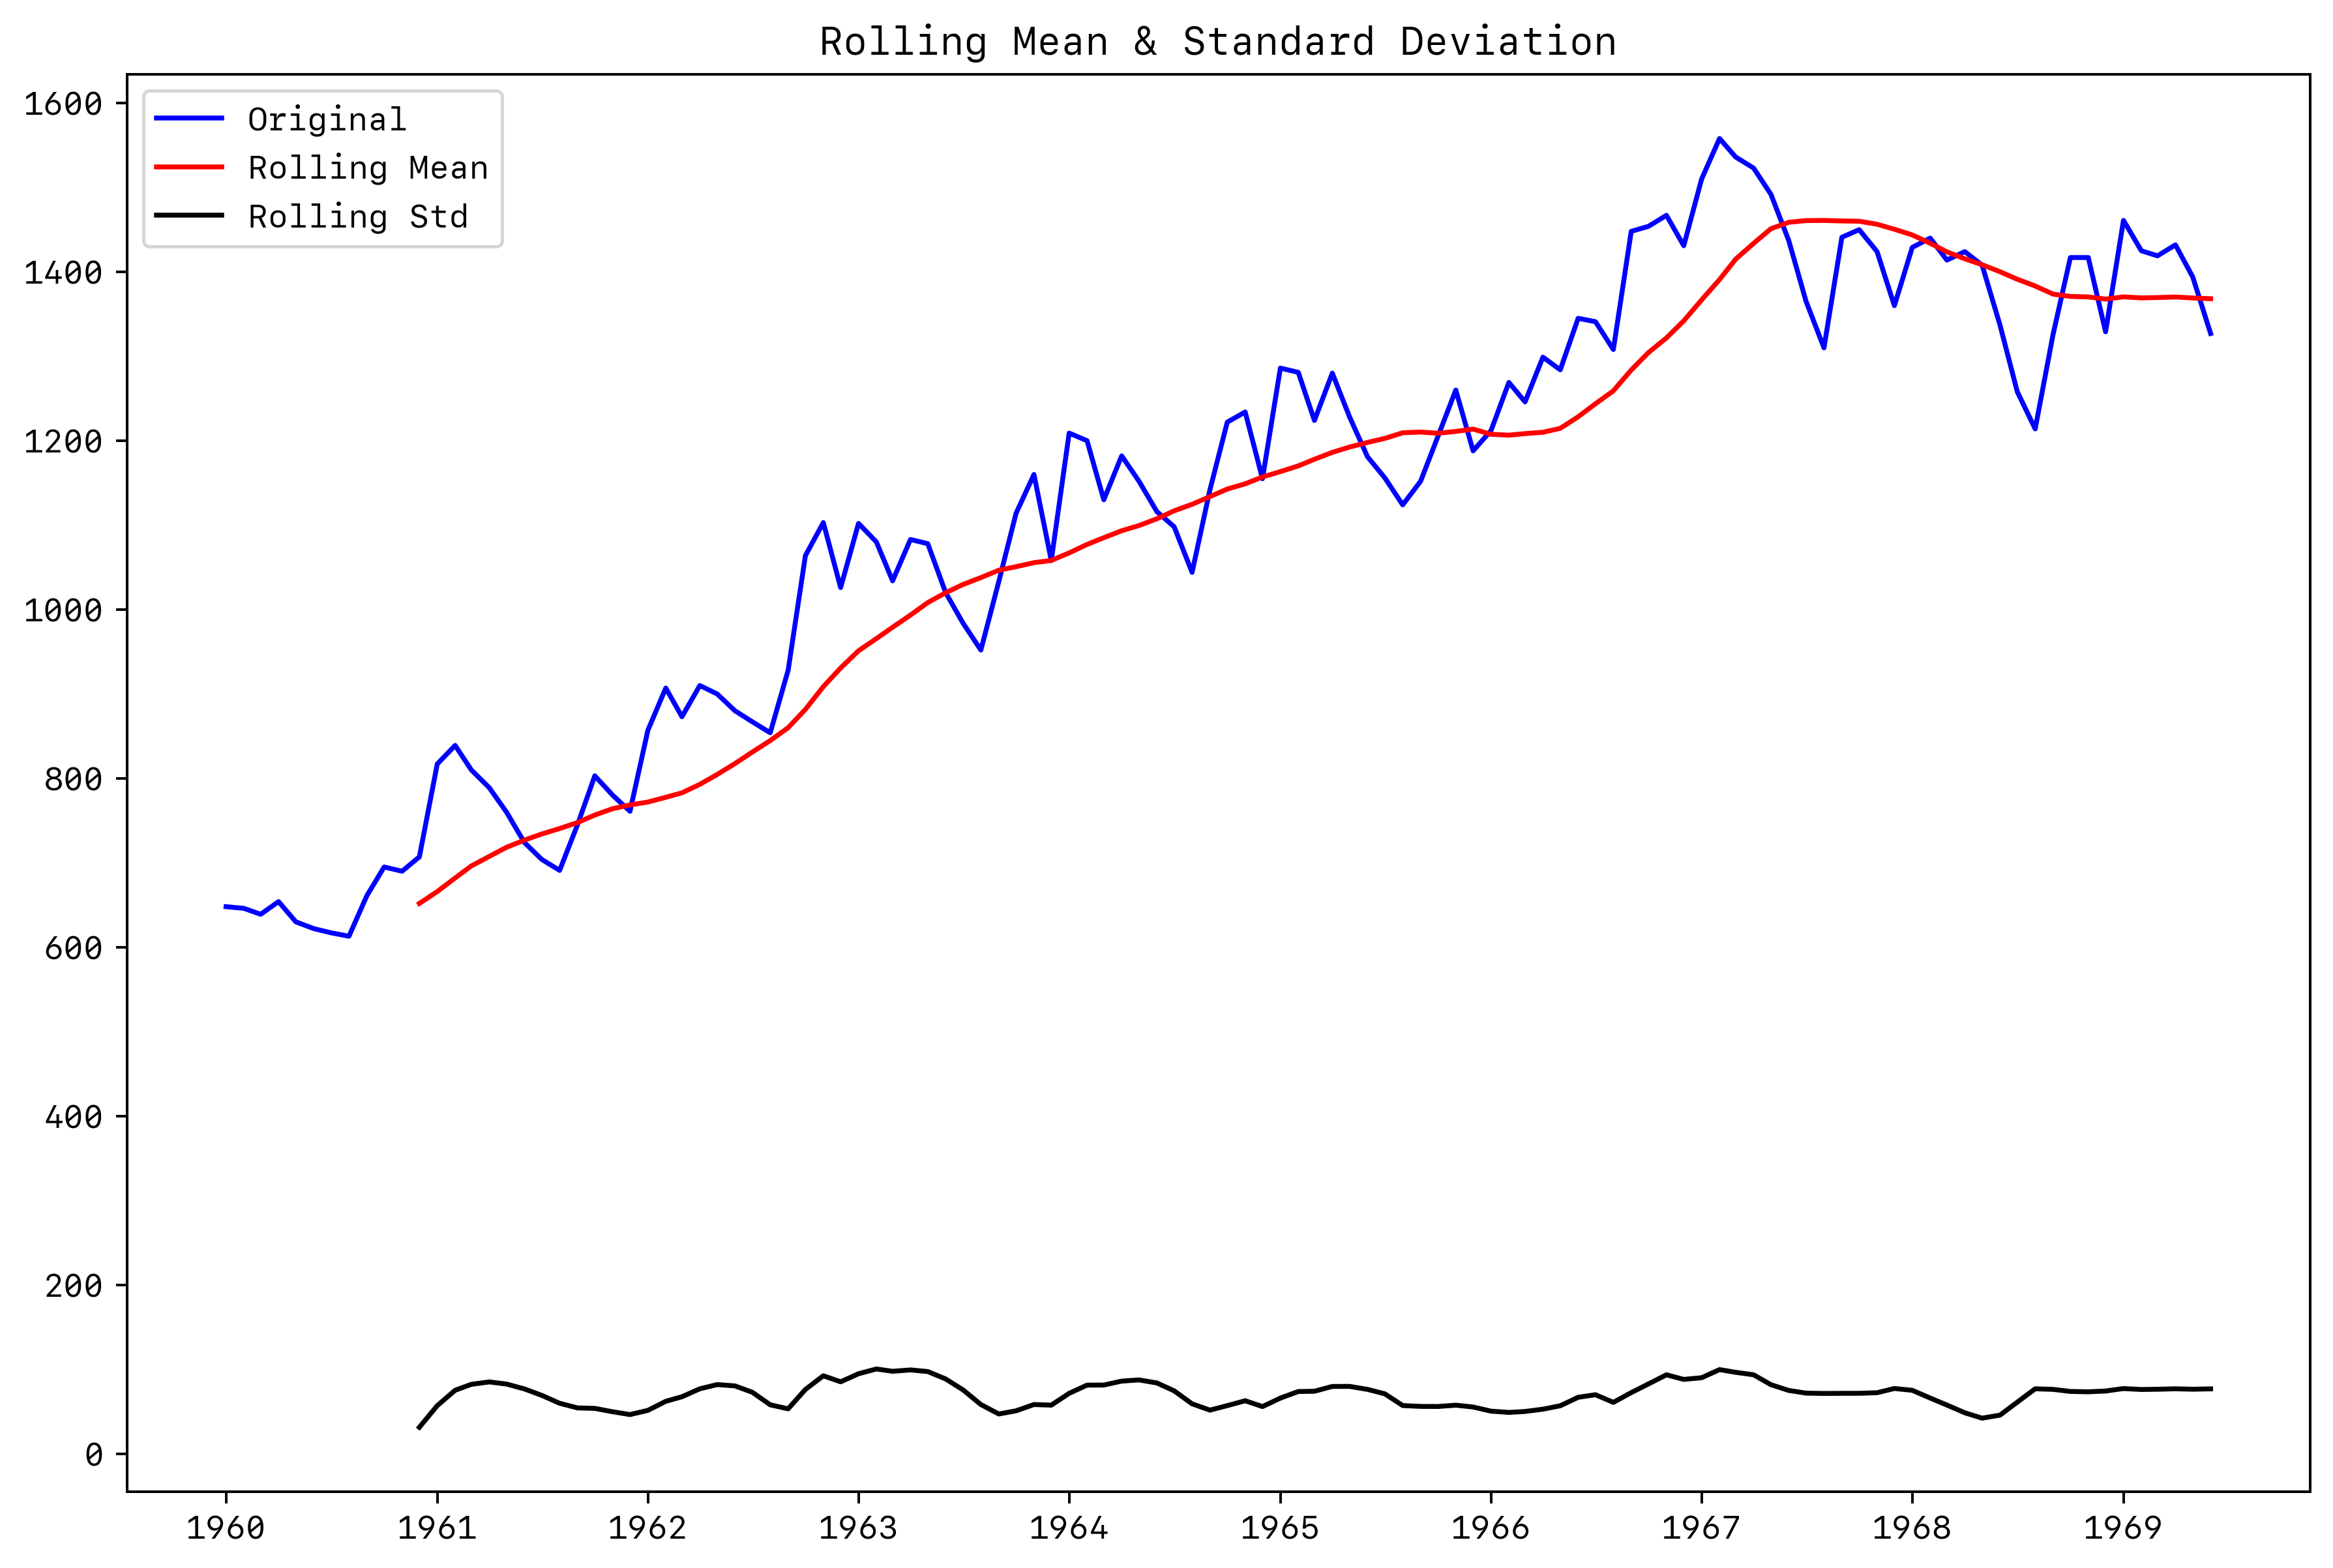

Results of Dickey-Fuller Test:
测试统计量           -1.536597
p值               0.515336
#滞后阶            12.000000
使用的样本量         101.000000
置信值区间 (1%)      -3.496818
置信值区间 (5%)      -2.890611
置信值区间 (10%)     -2.582277
dtype: float64


In [8]:
sys.path.insert(0, '/Users/Bureaux/Documents/workspace/PyCharmProjects/Modeling')
test_stationarity(df['riders'])

整体的序列并没有到达稳定性要求，要将时间序列转为平稳序列，有如下几种方法：

- Deflation by CPI Logarithmic（取对数）
- First Difference（一阶差分）
- Seasonal Difference（季节差分）
- Seasonal Adjustment

尝试取对数、一阶查分、季节差分三种方法，先进行一阶差分，去除增长趋势后检测稳定性：
(p值越小越好)

滞后偏差：预测数据对过去数据的依赖程度

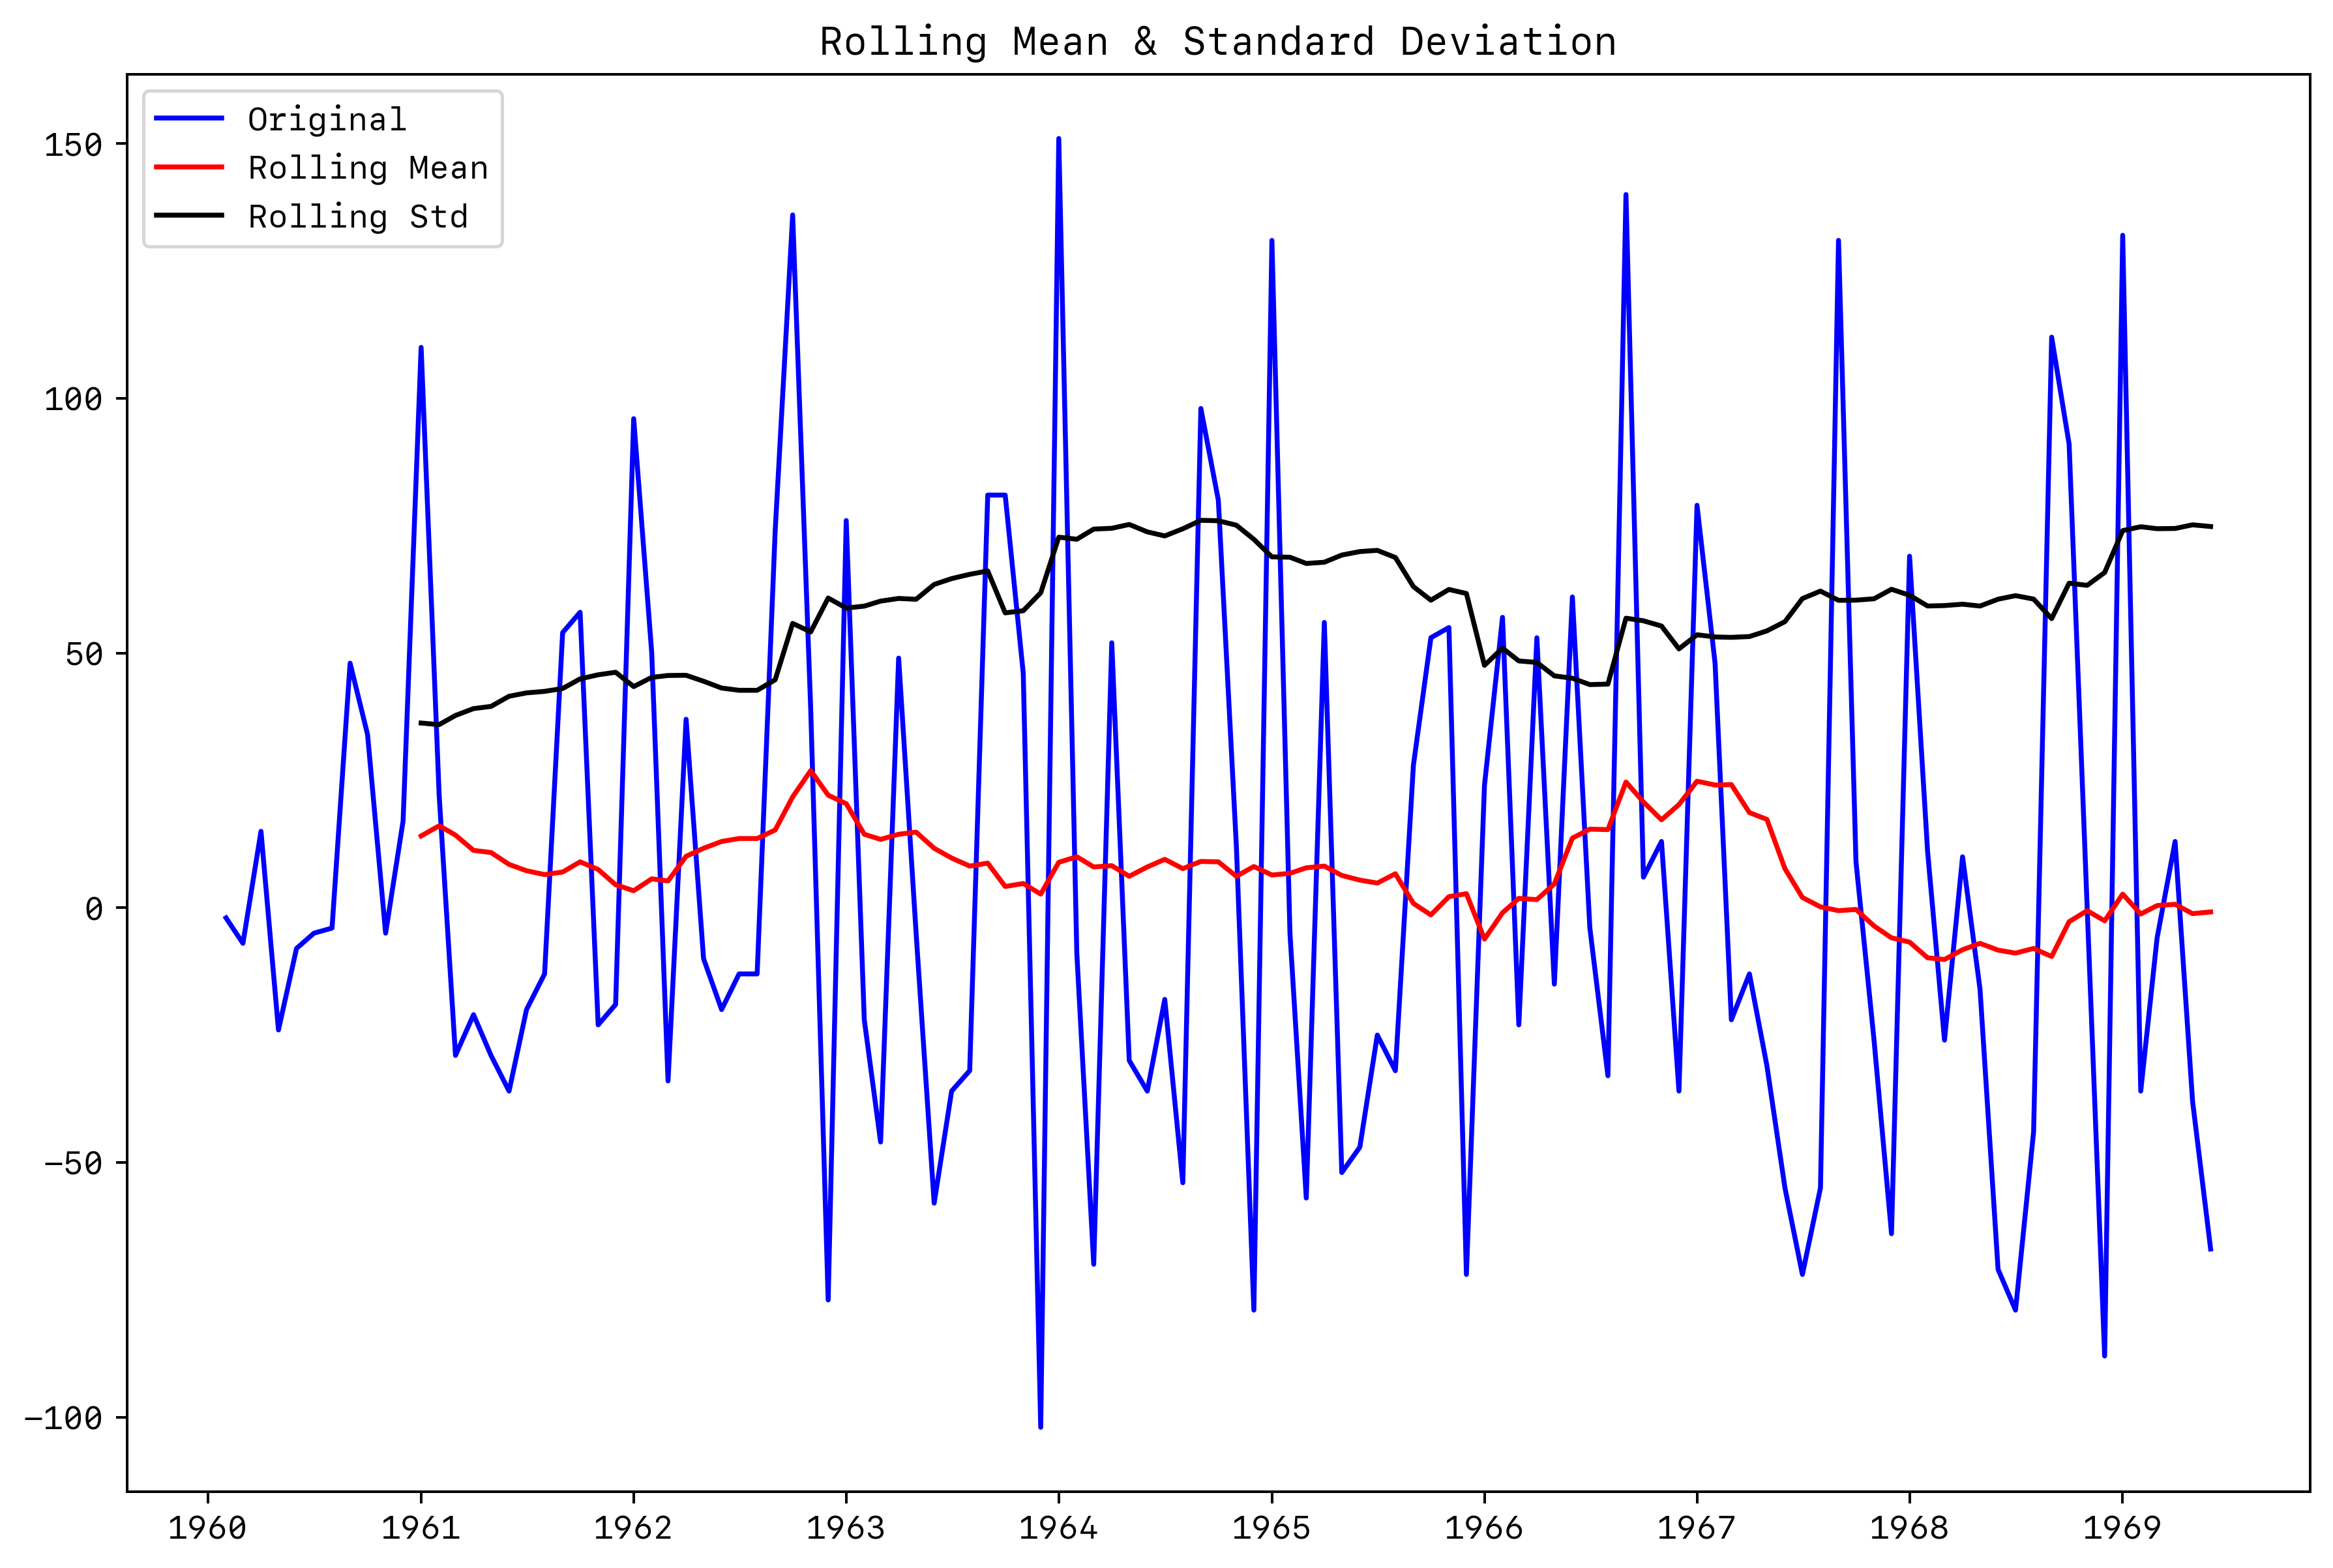

Results of Dickey-Fuller Test:
测试统计量           -1.938696
p值               0.314082
#滞后阶            11.000000
使用的样本量         101.000000
置信值区间 (1%)      -3.496818
置信值区间 (5%)      -2.890611
置信值区间 (10%)     -2.582277
dtype: float64


In [9]:
df['first_difference'] = df['riders'].diff(1)
test_stationarity(df['first_difference'].dropna(inplace=False))

看到图形上看上去变稳定了， 但p-value的并没有小于0.05。 再来看看12阶查分（即季节查分）， 看看是否稳定

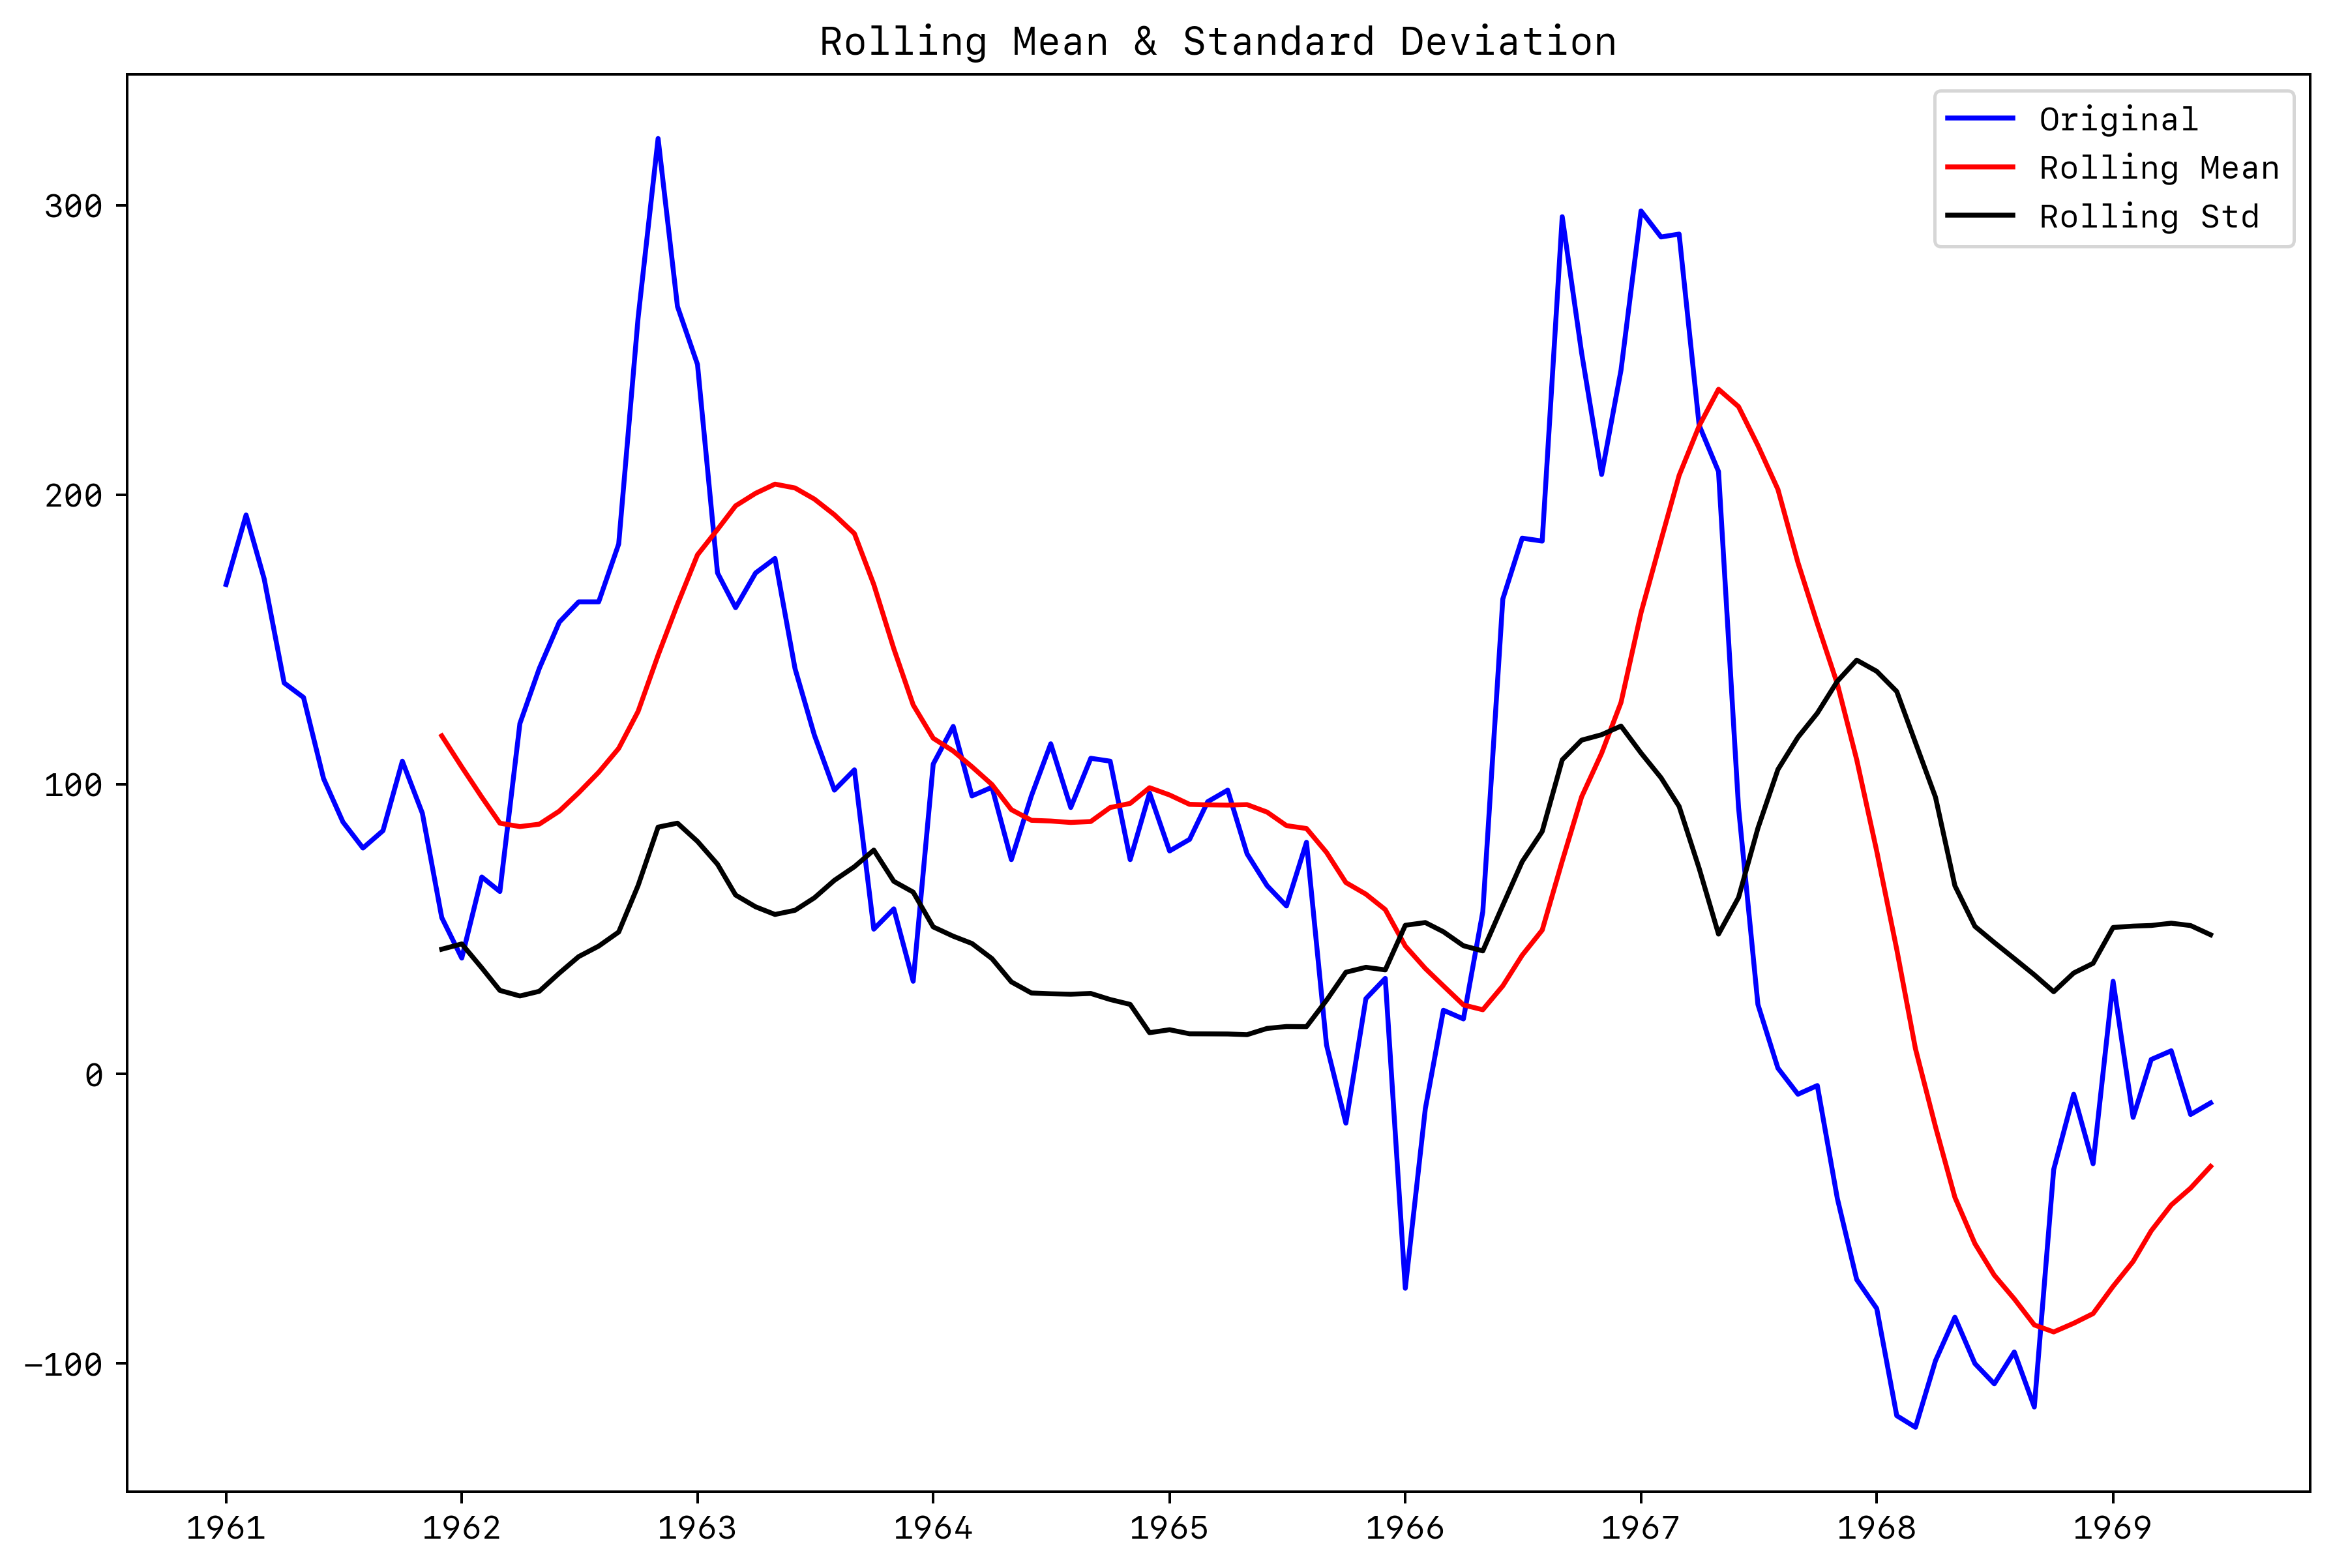

Results of Dickey-Fuller Test:
测试统计量          -2.469741
p值              0.123011
#滞后阶            3.000000
使用的样本量         98.000000
置信值区间 (1%)     -3.498910
置信值区间 (5%)     -2.891516
置信值区间 (10%)    -2.582760
dtype: float64


In [10]:
df['seasonal_difference'] = df['riders'].diff(12)
test_stationarity(df['seasonal_difference'].dropna(inplace=False))

从图形上，比一阶差分更不稳定 （虽然季节指标已经出来了）， 我们再来将一阶差分和季节差分 合并起来.

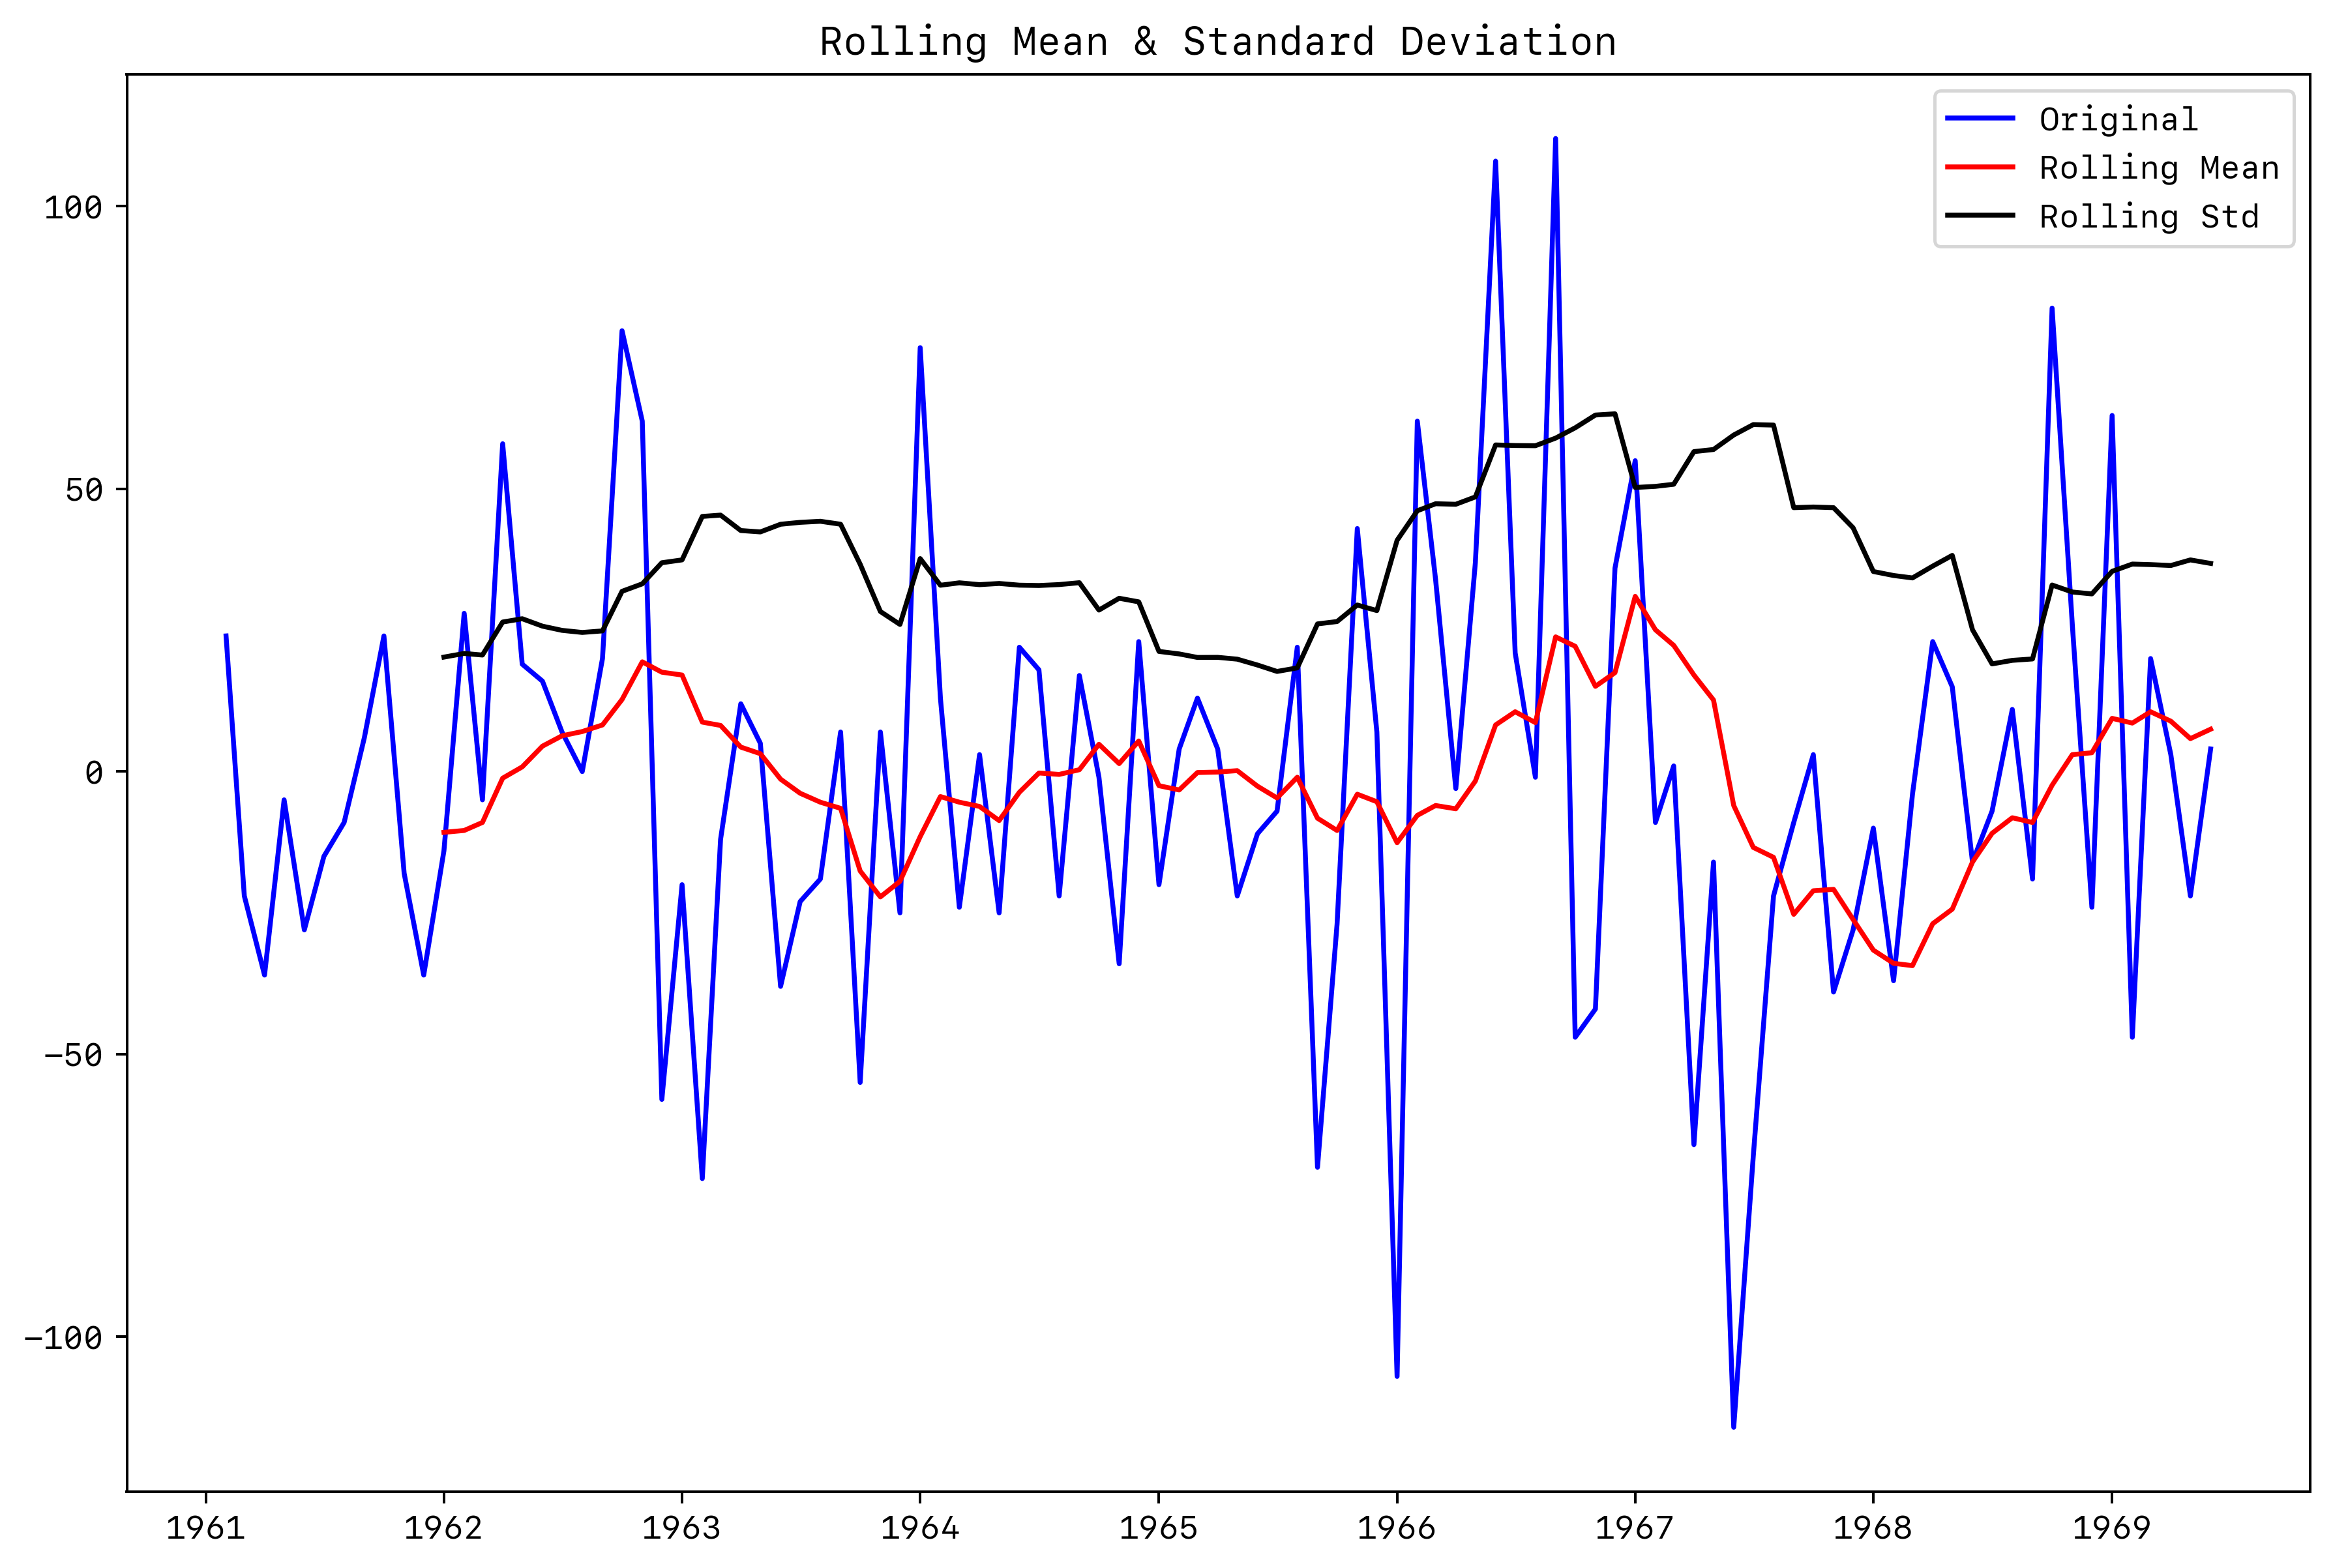

Results of Dickey-Fuller Test:
测试统计量         -9.258520e+00
p值             1.427874e-15
#滞后阶           0.000000e+00
使用的样本量         1.000000e+02
置信值区间 (1%)    -3.497501e+00
置信值区间 (5%)    -2.890906e+00
置信值区间 (10%)   -2.582435e+00
dtype: float64


In [11]:
df['seasonal_first_difference'] = df['riders'].diff(1).diff(12)
test_stationarity(df['seasonal_first_difference'].dropna(inplace=False))

在一阶差分后再加上季节差分，数据终于稳定下了。 P-value小于了0.05，并且Test Statistic的值 远远小于Critical Value (5%)的值。

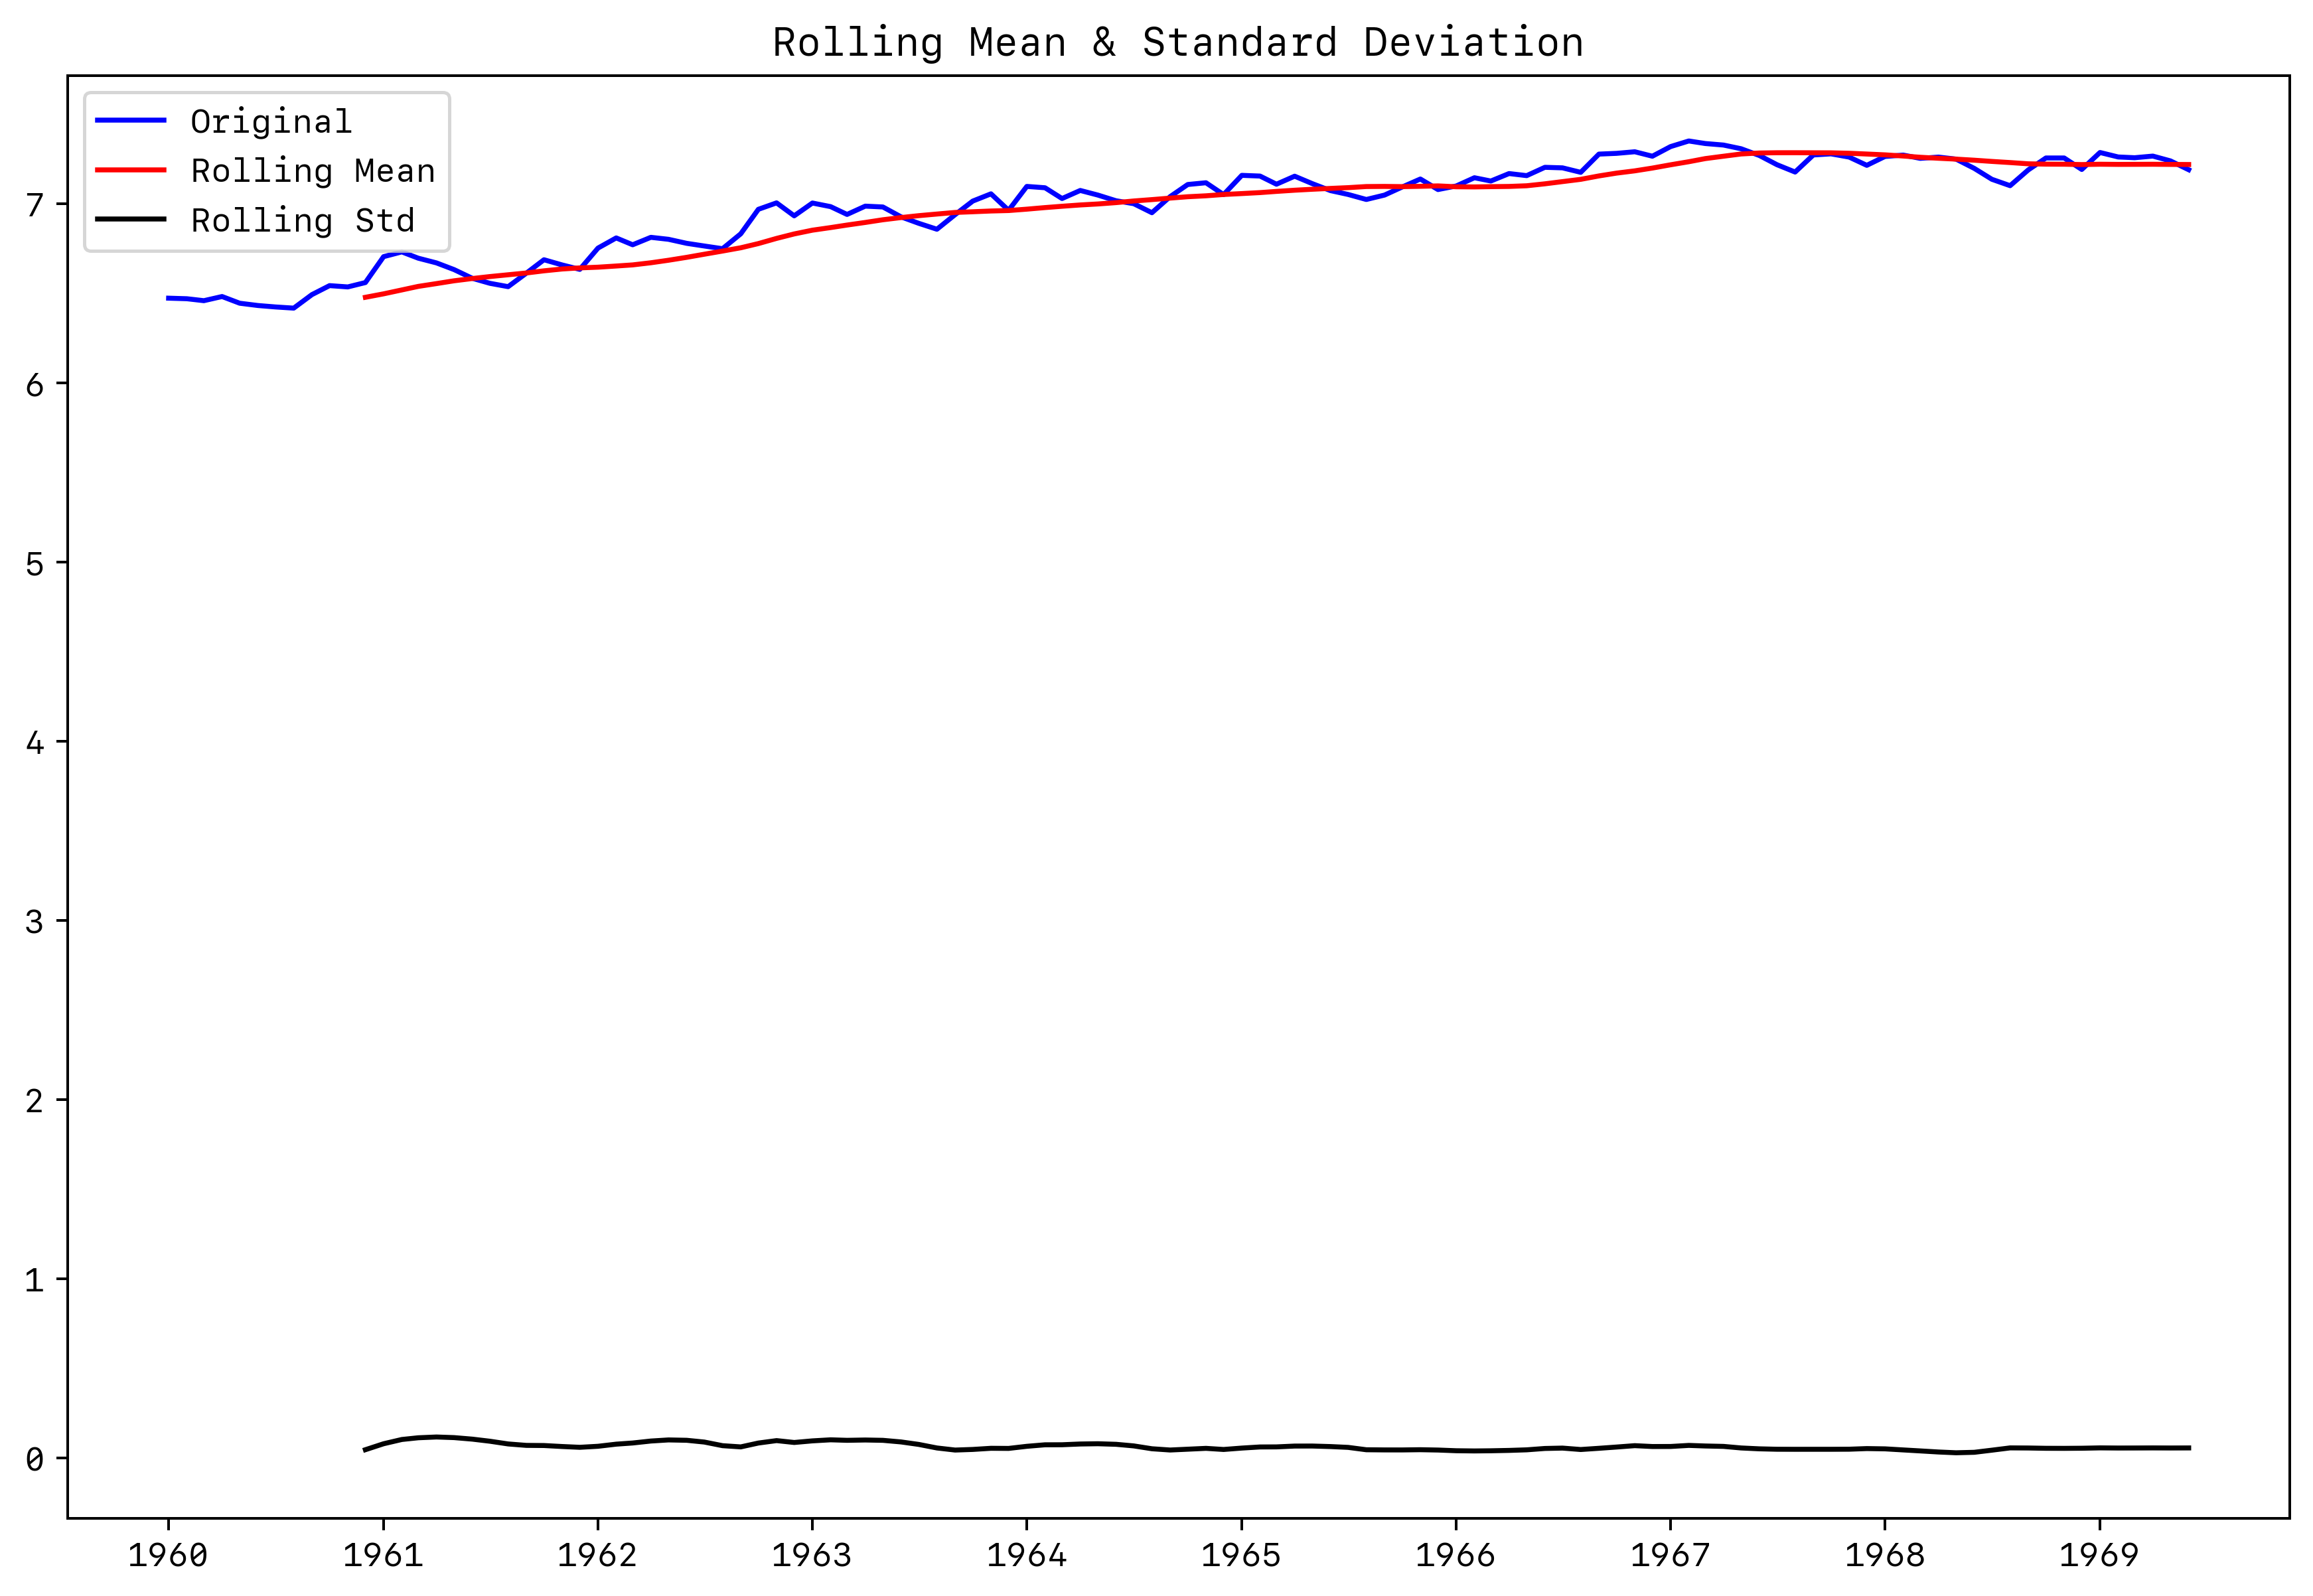

Results of Dickey-Fuller Test:
测试统计量           -1.677830
p值               0.442570
#滞后阶            12.000000
使用的样本量         101.000000
置信值区间 (1%)      -3.496818
置信值区间 (5%)      -2.890611
置信值区间 (10%)     -2.582277
dtype: float64


In [12]:
df['riders_log'] = np.log(df['riders'])
test_stationarity(df['riders_log'])

取对数后，从图形上看有些稳定了， 但p-value还是没有接近0.05， 没能达稳定性要求。在此基础上 我们再来做下一阶差分，去除增长趋势：

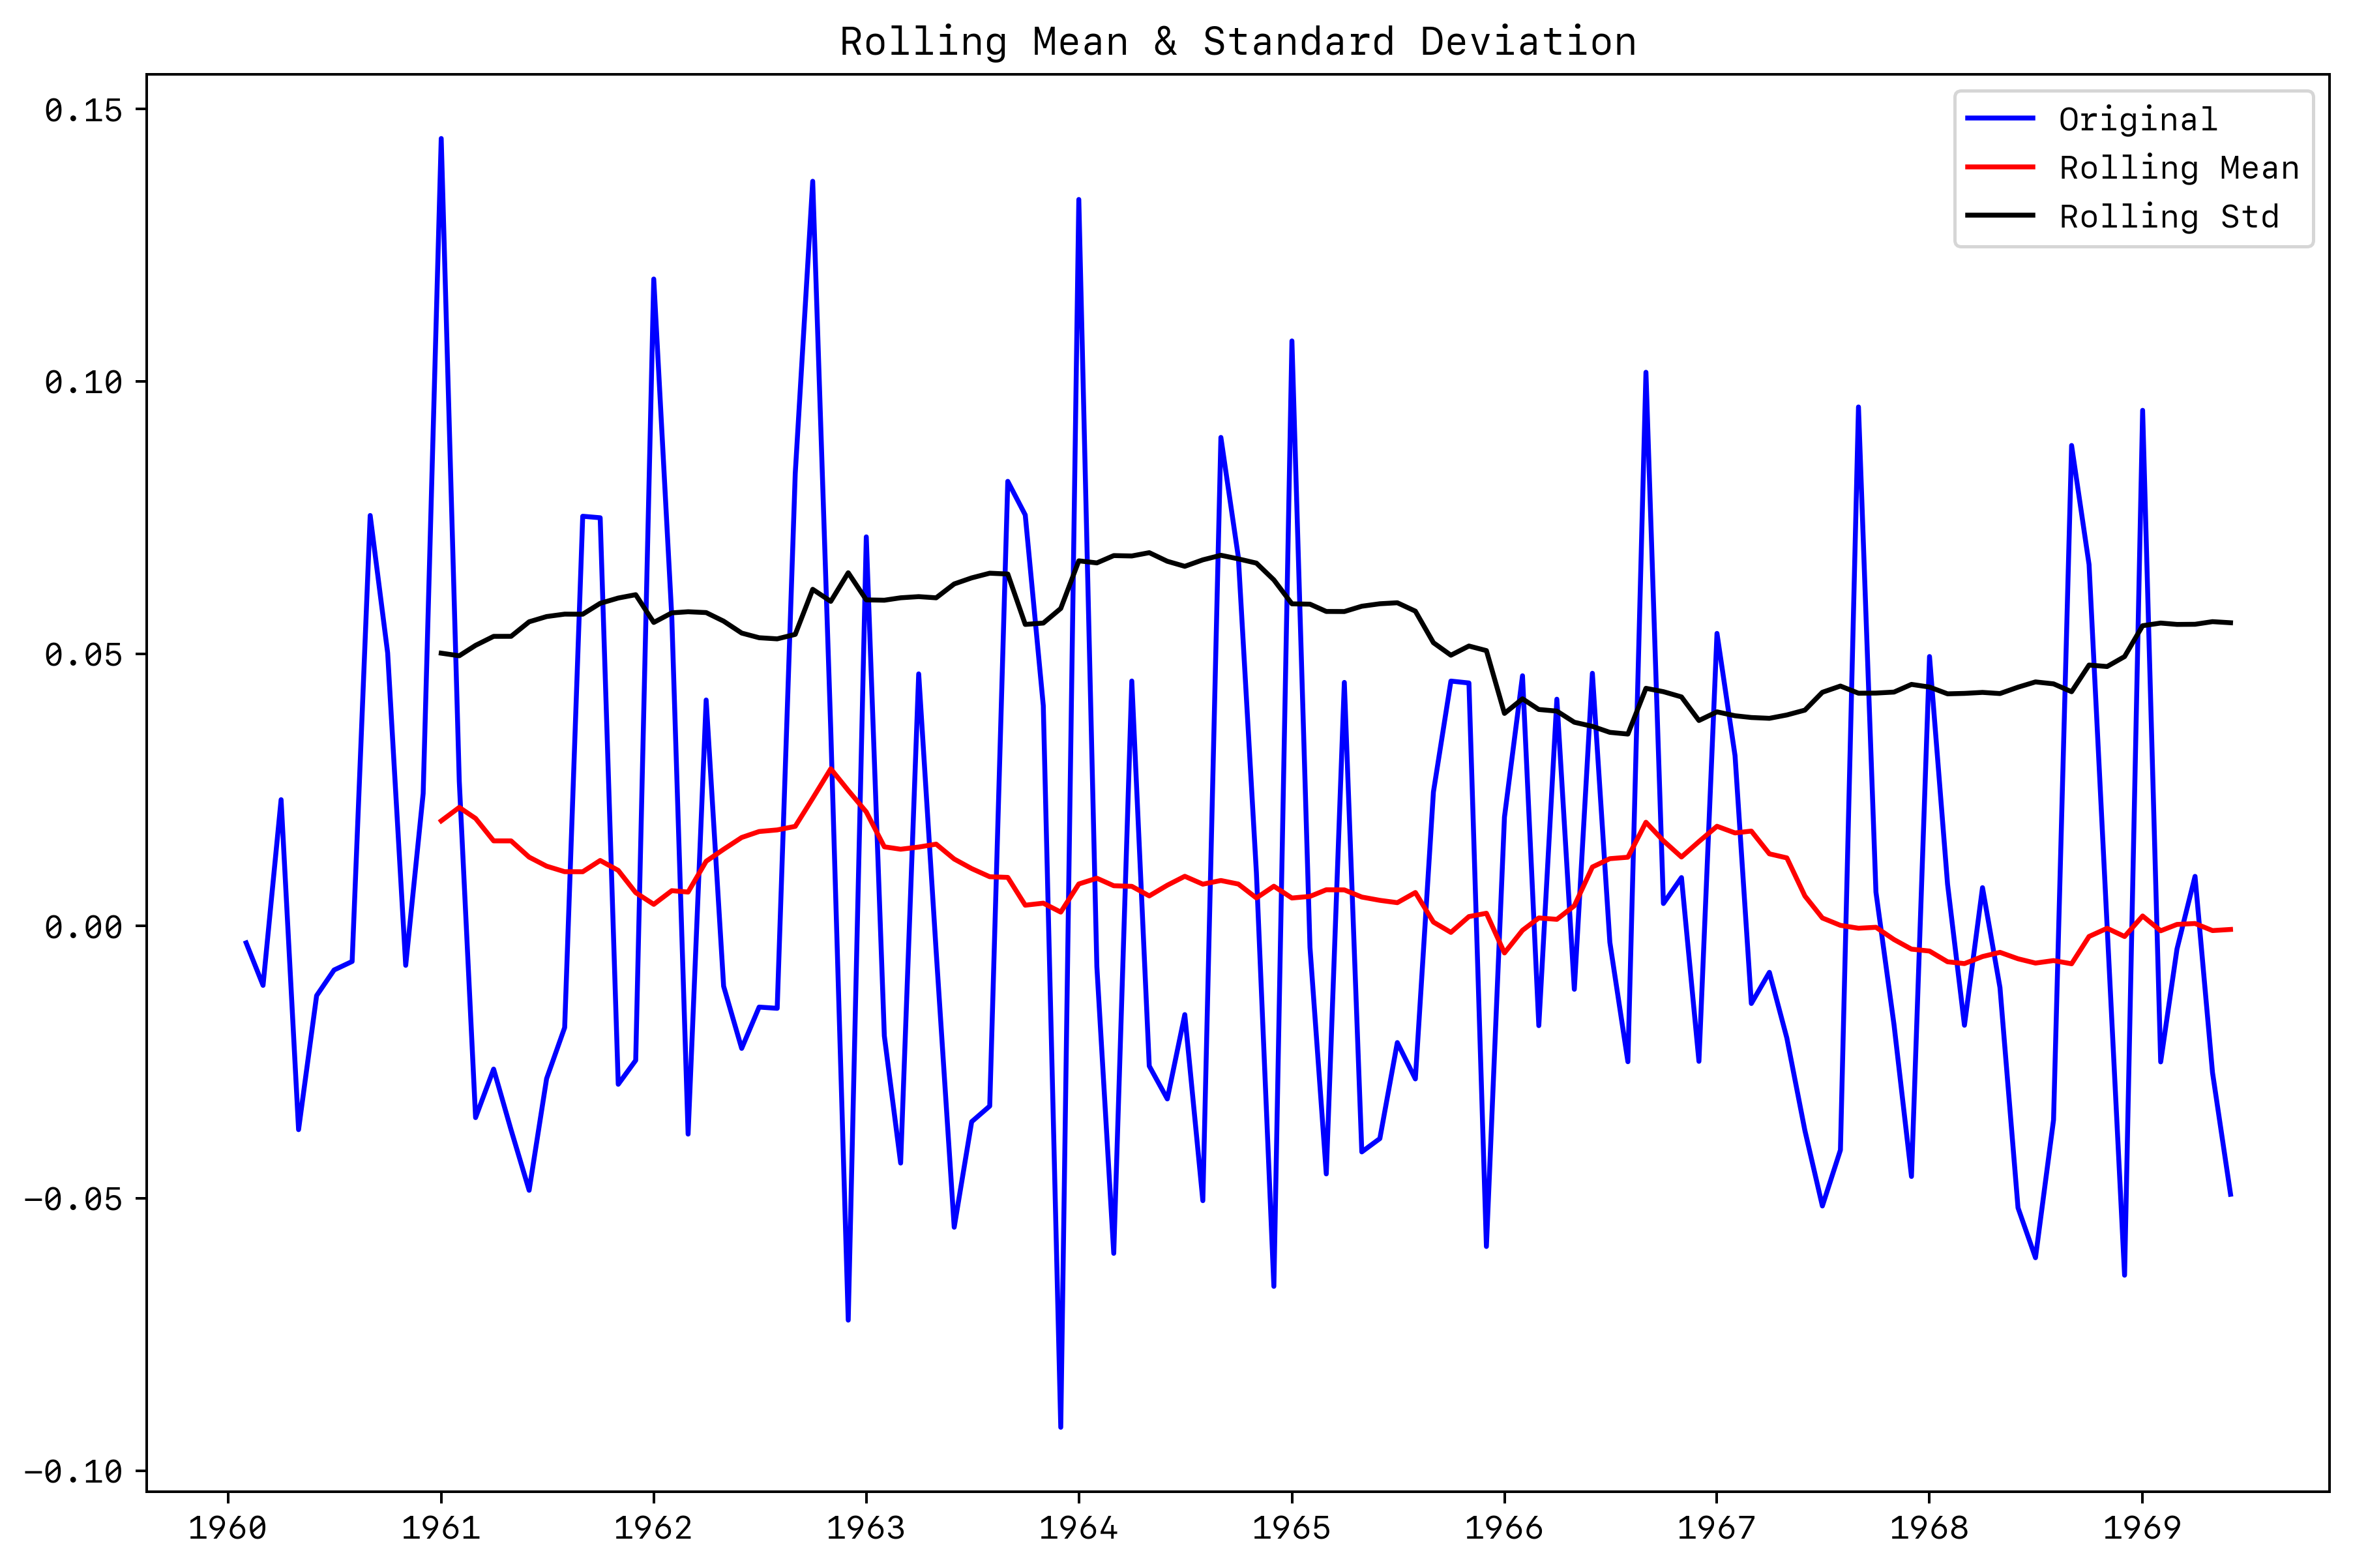

Results of Dickey-Fuller Test:
测试统计量           -2.047539
p值               0.266126
#滞后阶            11.000000
使用的样本量         101.000000
置信值区间 (1%)      -3.496818
置信值区间 (5%)      -2.890611
置信值区间 (10%)     -2.582277
dtype: float64


In [13]:
df['log_first_difference'] = np.log(df['riders']).diff(1)
test_stationarity(df['log_first_difference'].dropna(inplace=False))

还是没能满足需求， 我们再来对对数进行季节性差分：

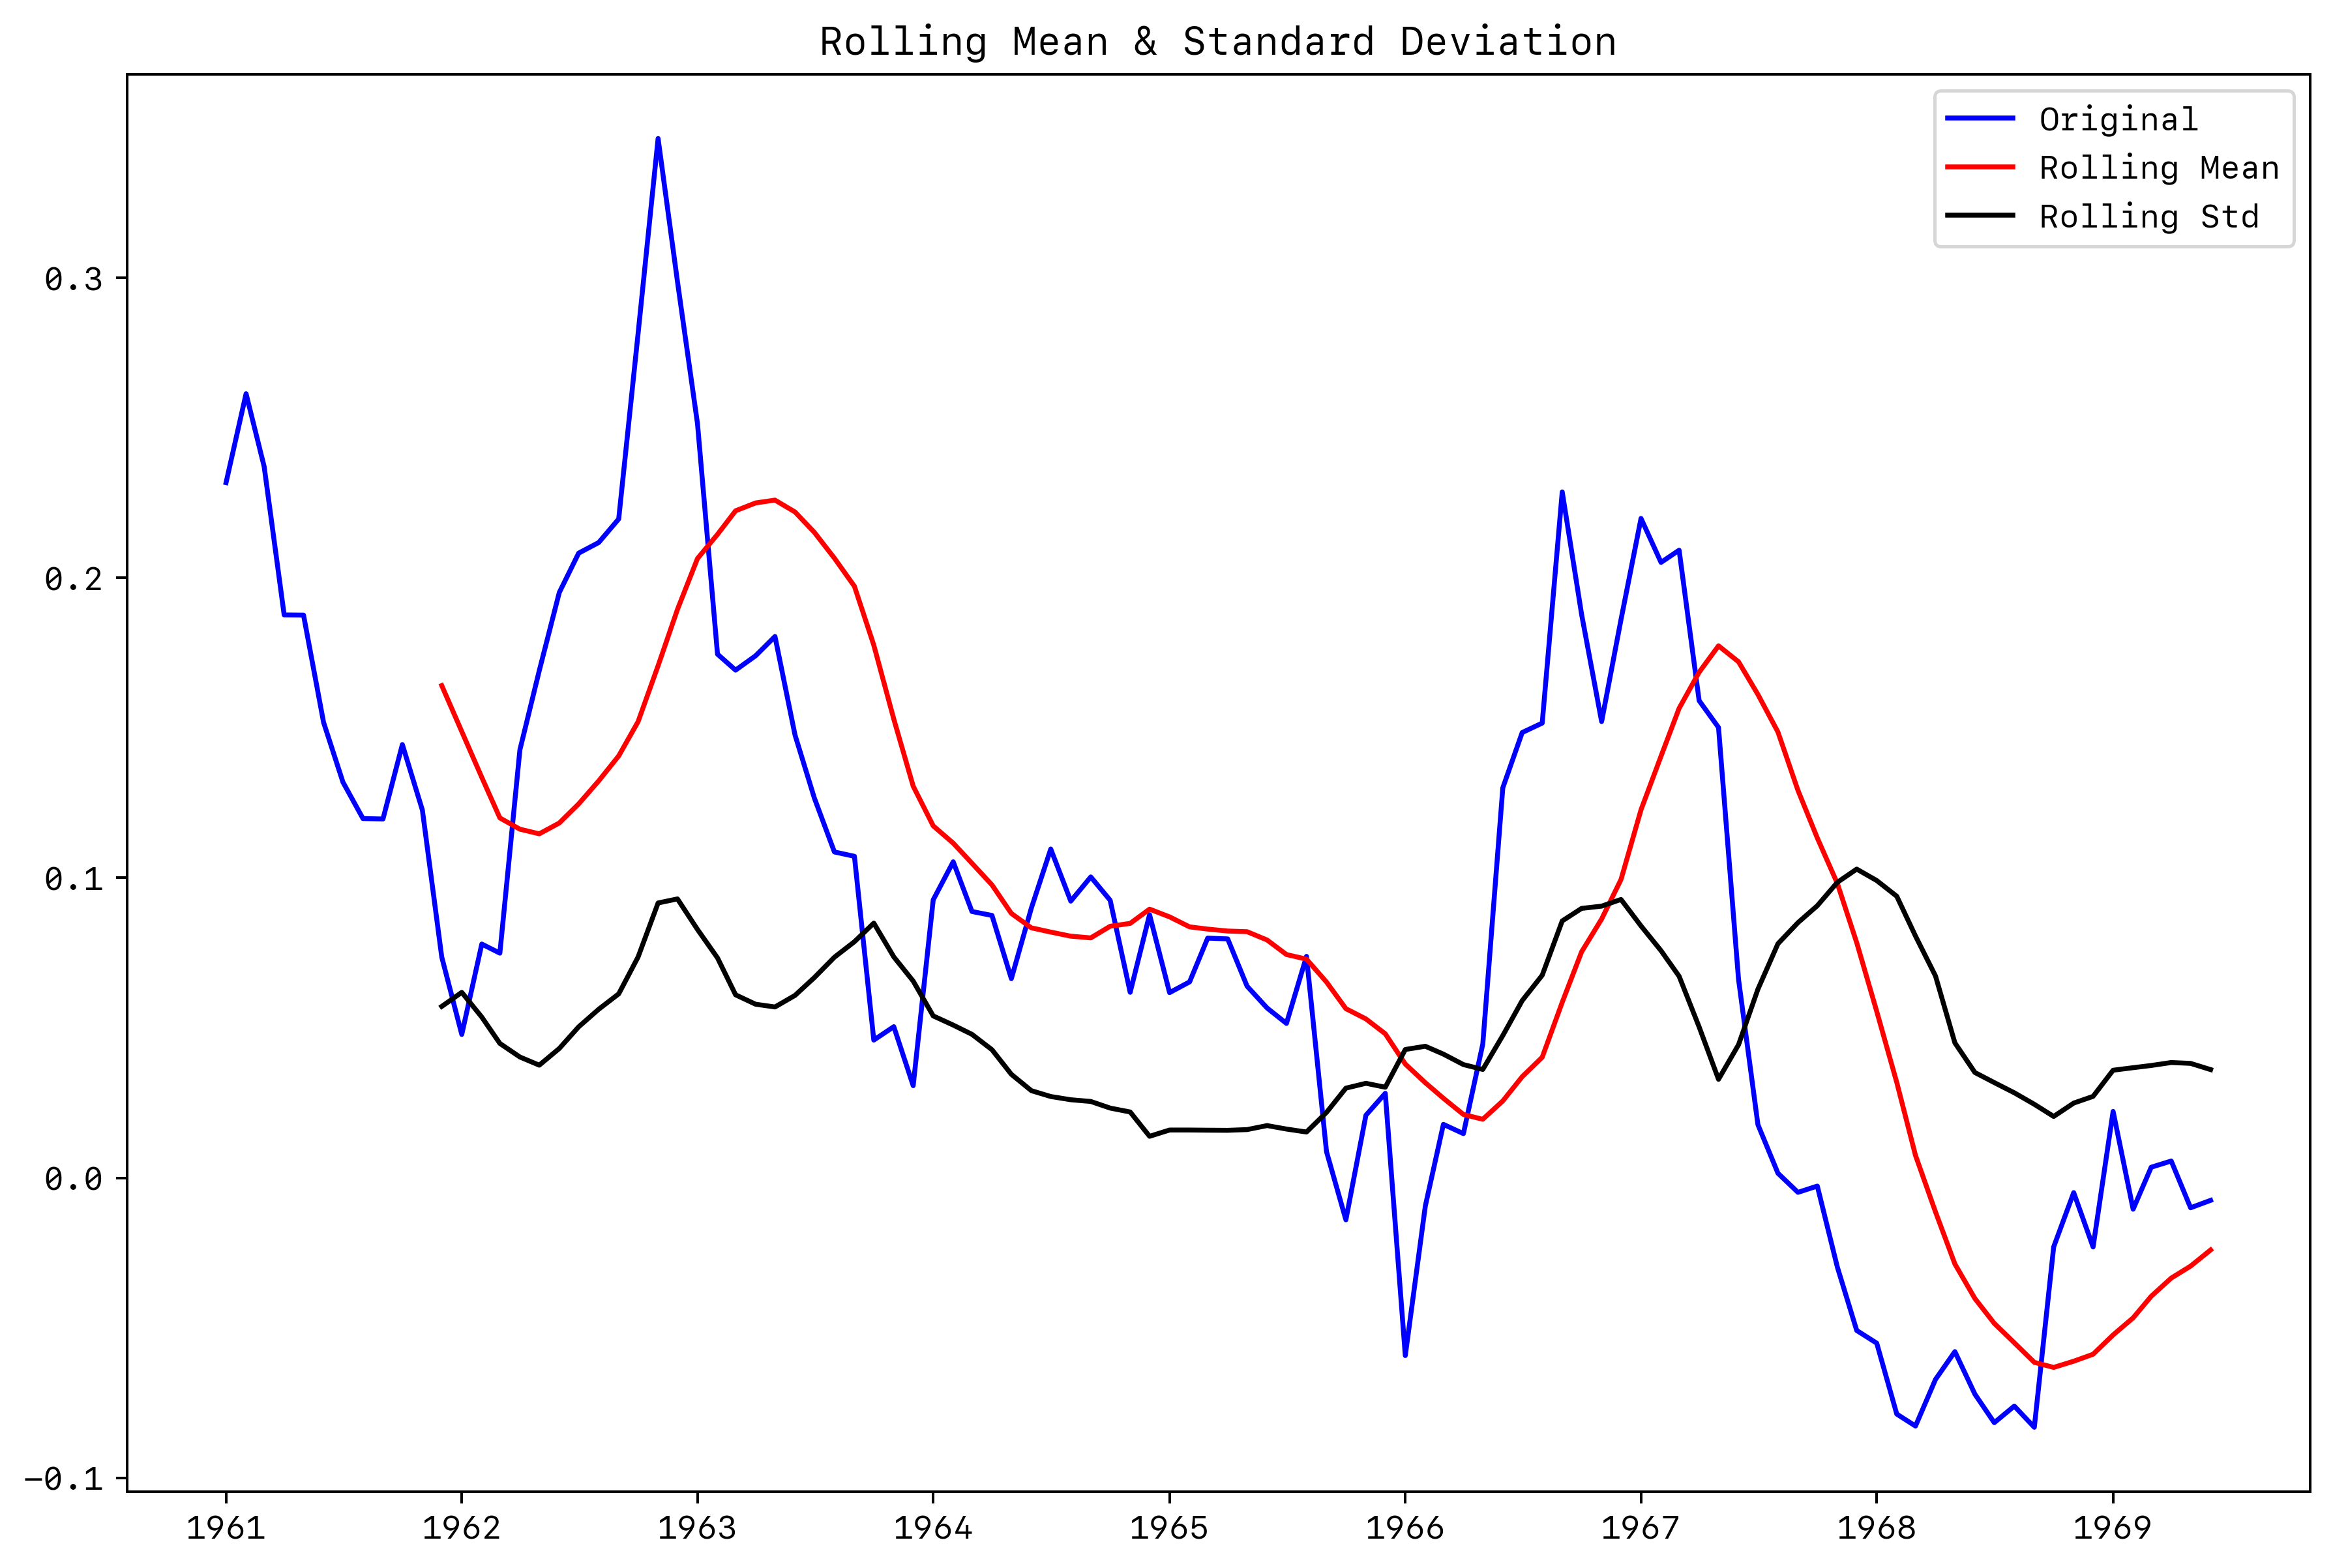

Results of Dickey-Fuller Test:
测试统计量           -1.919681
p值               0.322860
#滞后阶             0.000000
使用的样本量         101.000000
置信值区间 (1%)      -3.496818
置信值区间 (5%)      -2.890611
置信值区间 (10%)     -2.582277
dtype: float64


In [14]:
df['log_seasonal_difference'] = np.log(df['riders']).diff(12)
test_stationarity(df['log_seasonal_difference'].dropna(inplace=False))

还是没能满足需求，再来试试在对数基础上 进行一阶差分+季节差分的效果：

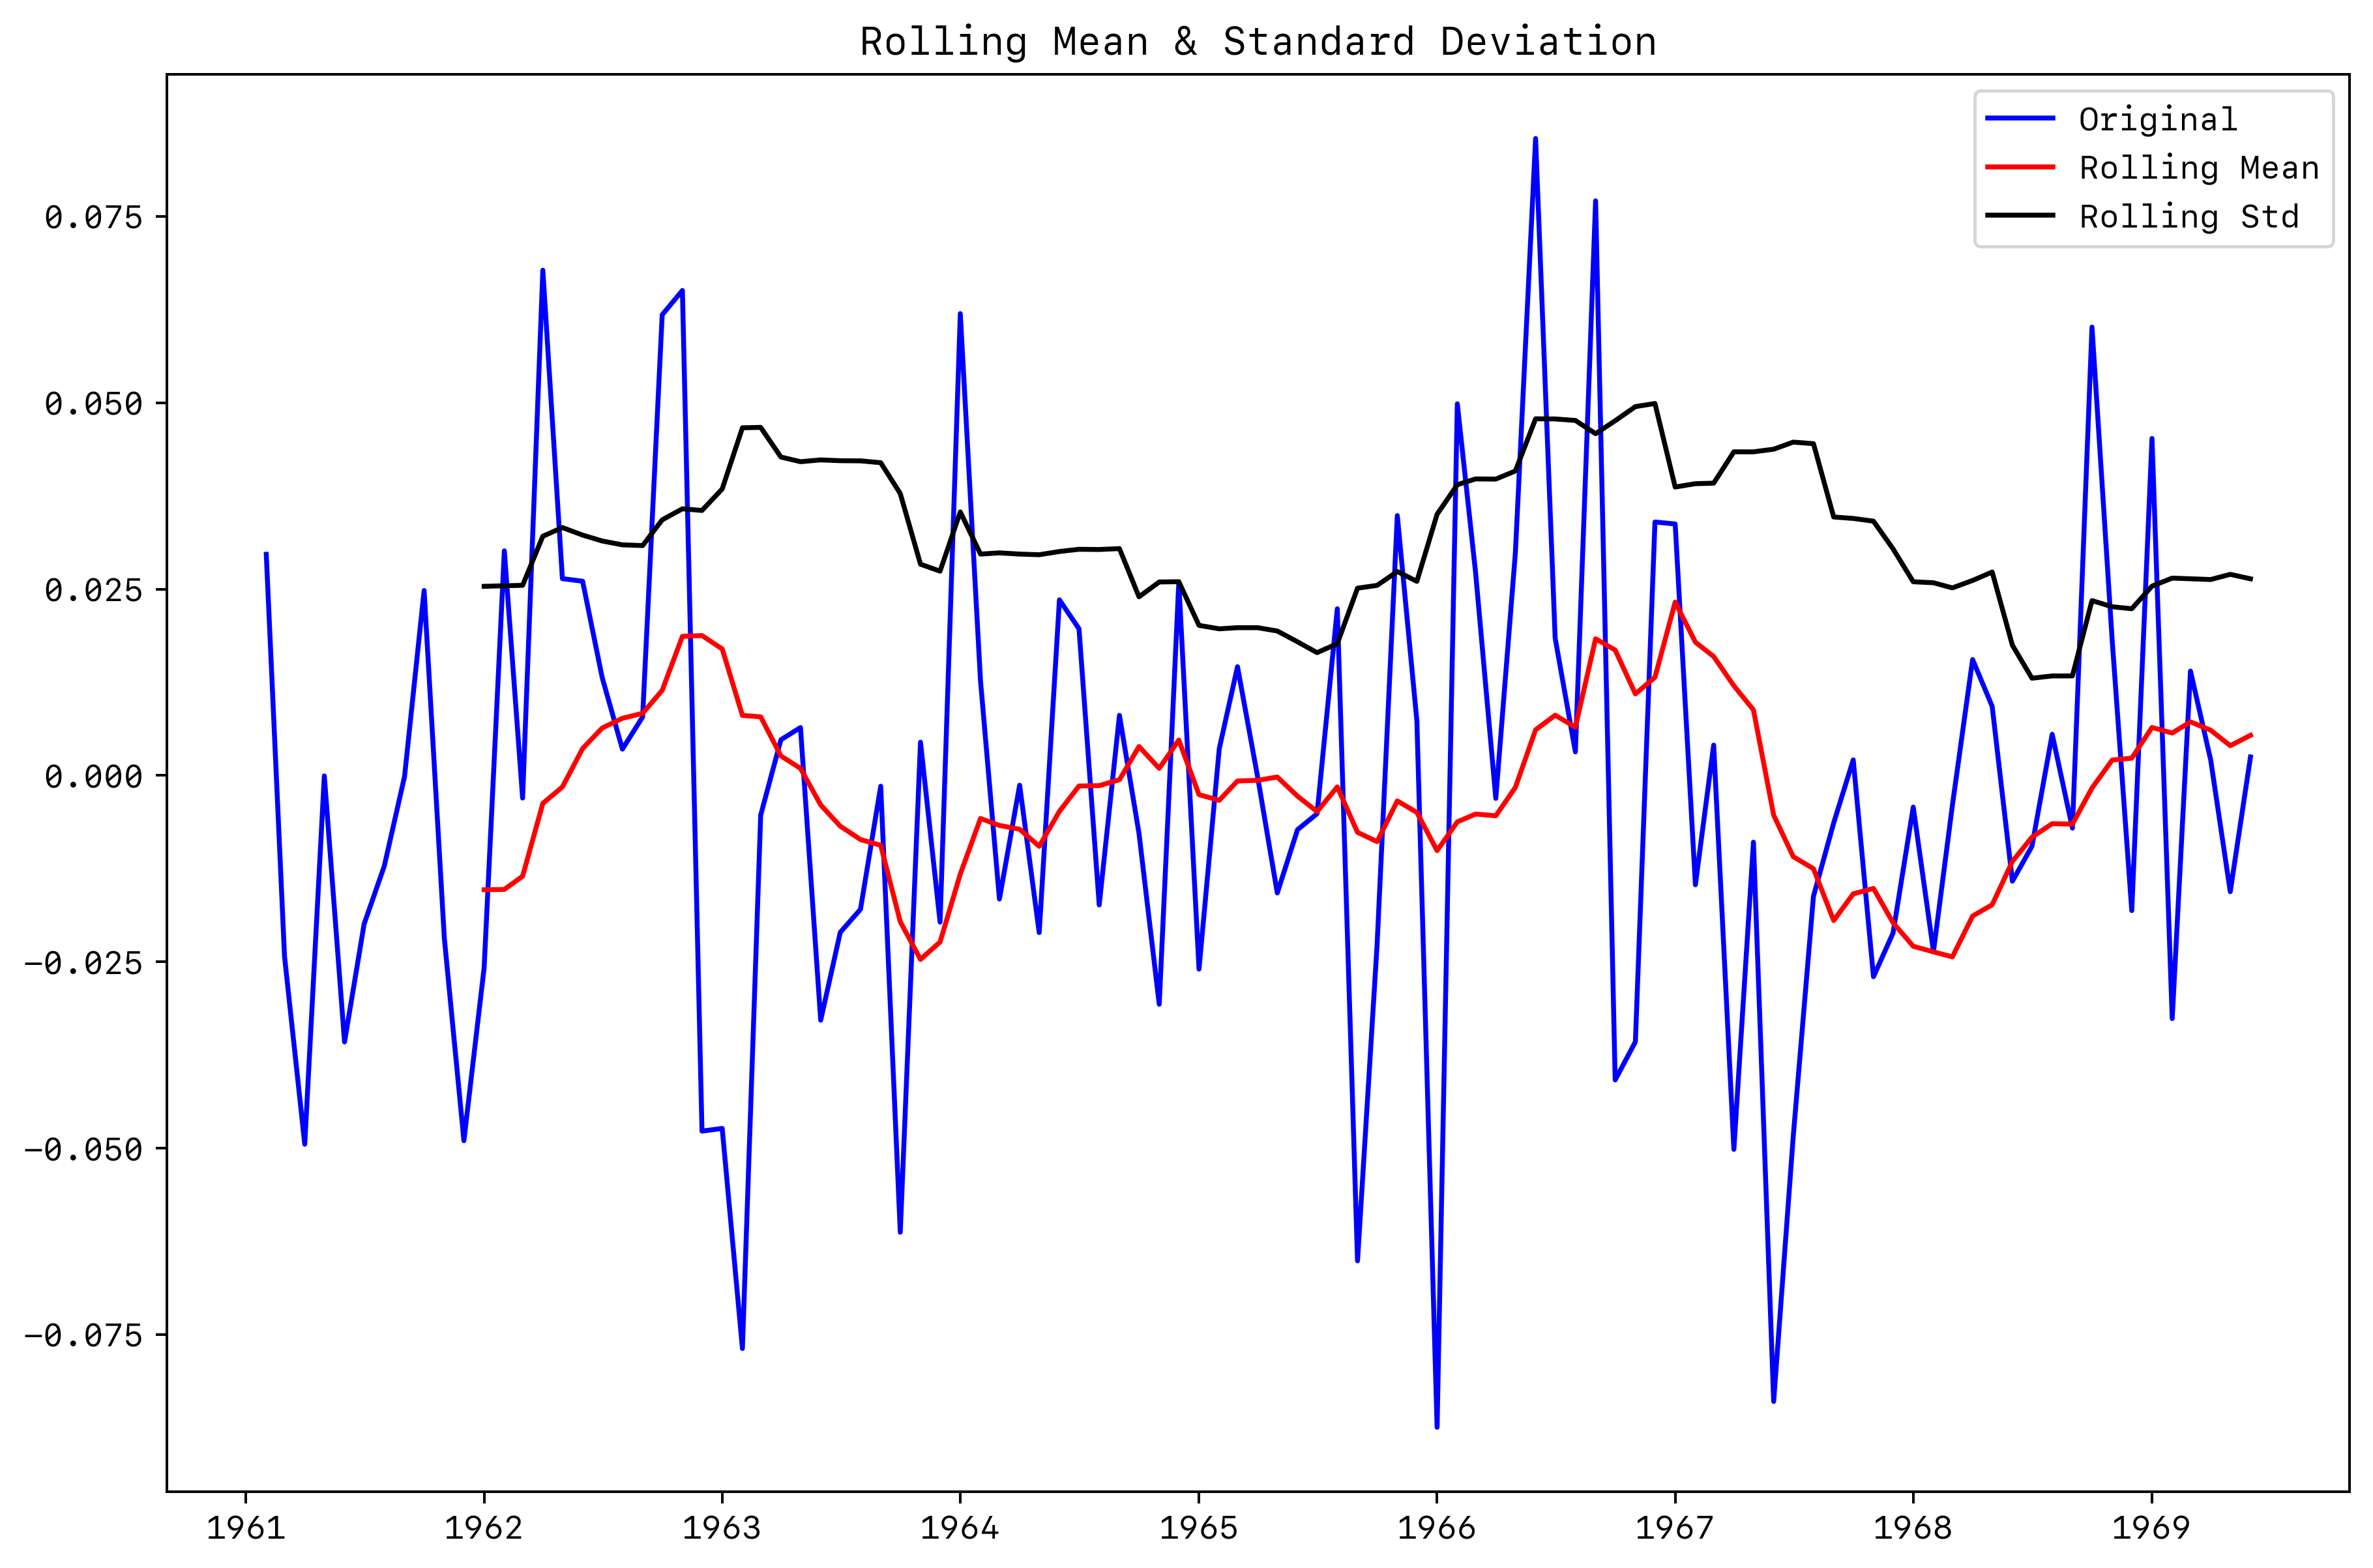

Results of Dickey-Fuller Test:
测试统计量         -8.882112e+00
p值             1.309452e-14
#滞后阶           0.000000e+00
使用的样本量         1.000000e+02
置信值区间 (1%)    -3.497501e+00
置信值区间 (5%)    -2.890906e+00
置信值区间 (10%)   -2.582435e+00
dtype: float64


In [15]:
df['log_seasonal_first_difference'] = np.log(df['riders']).diff(1).diff(12)
test_stationarity(df['log_seasonal_first_difference'].dropna(inplace=False))

可以看到稳定了满足需求了，但是稳定性相比不取对数的情况下，并没有提升而是下降了。

/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


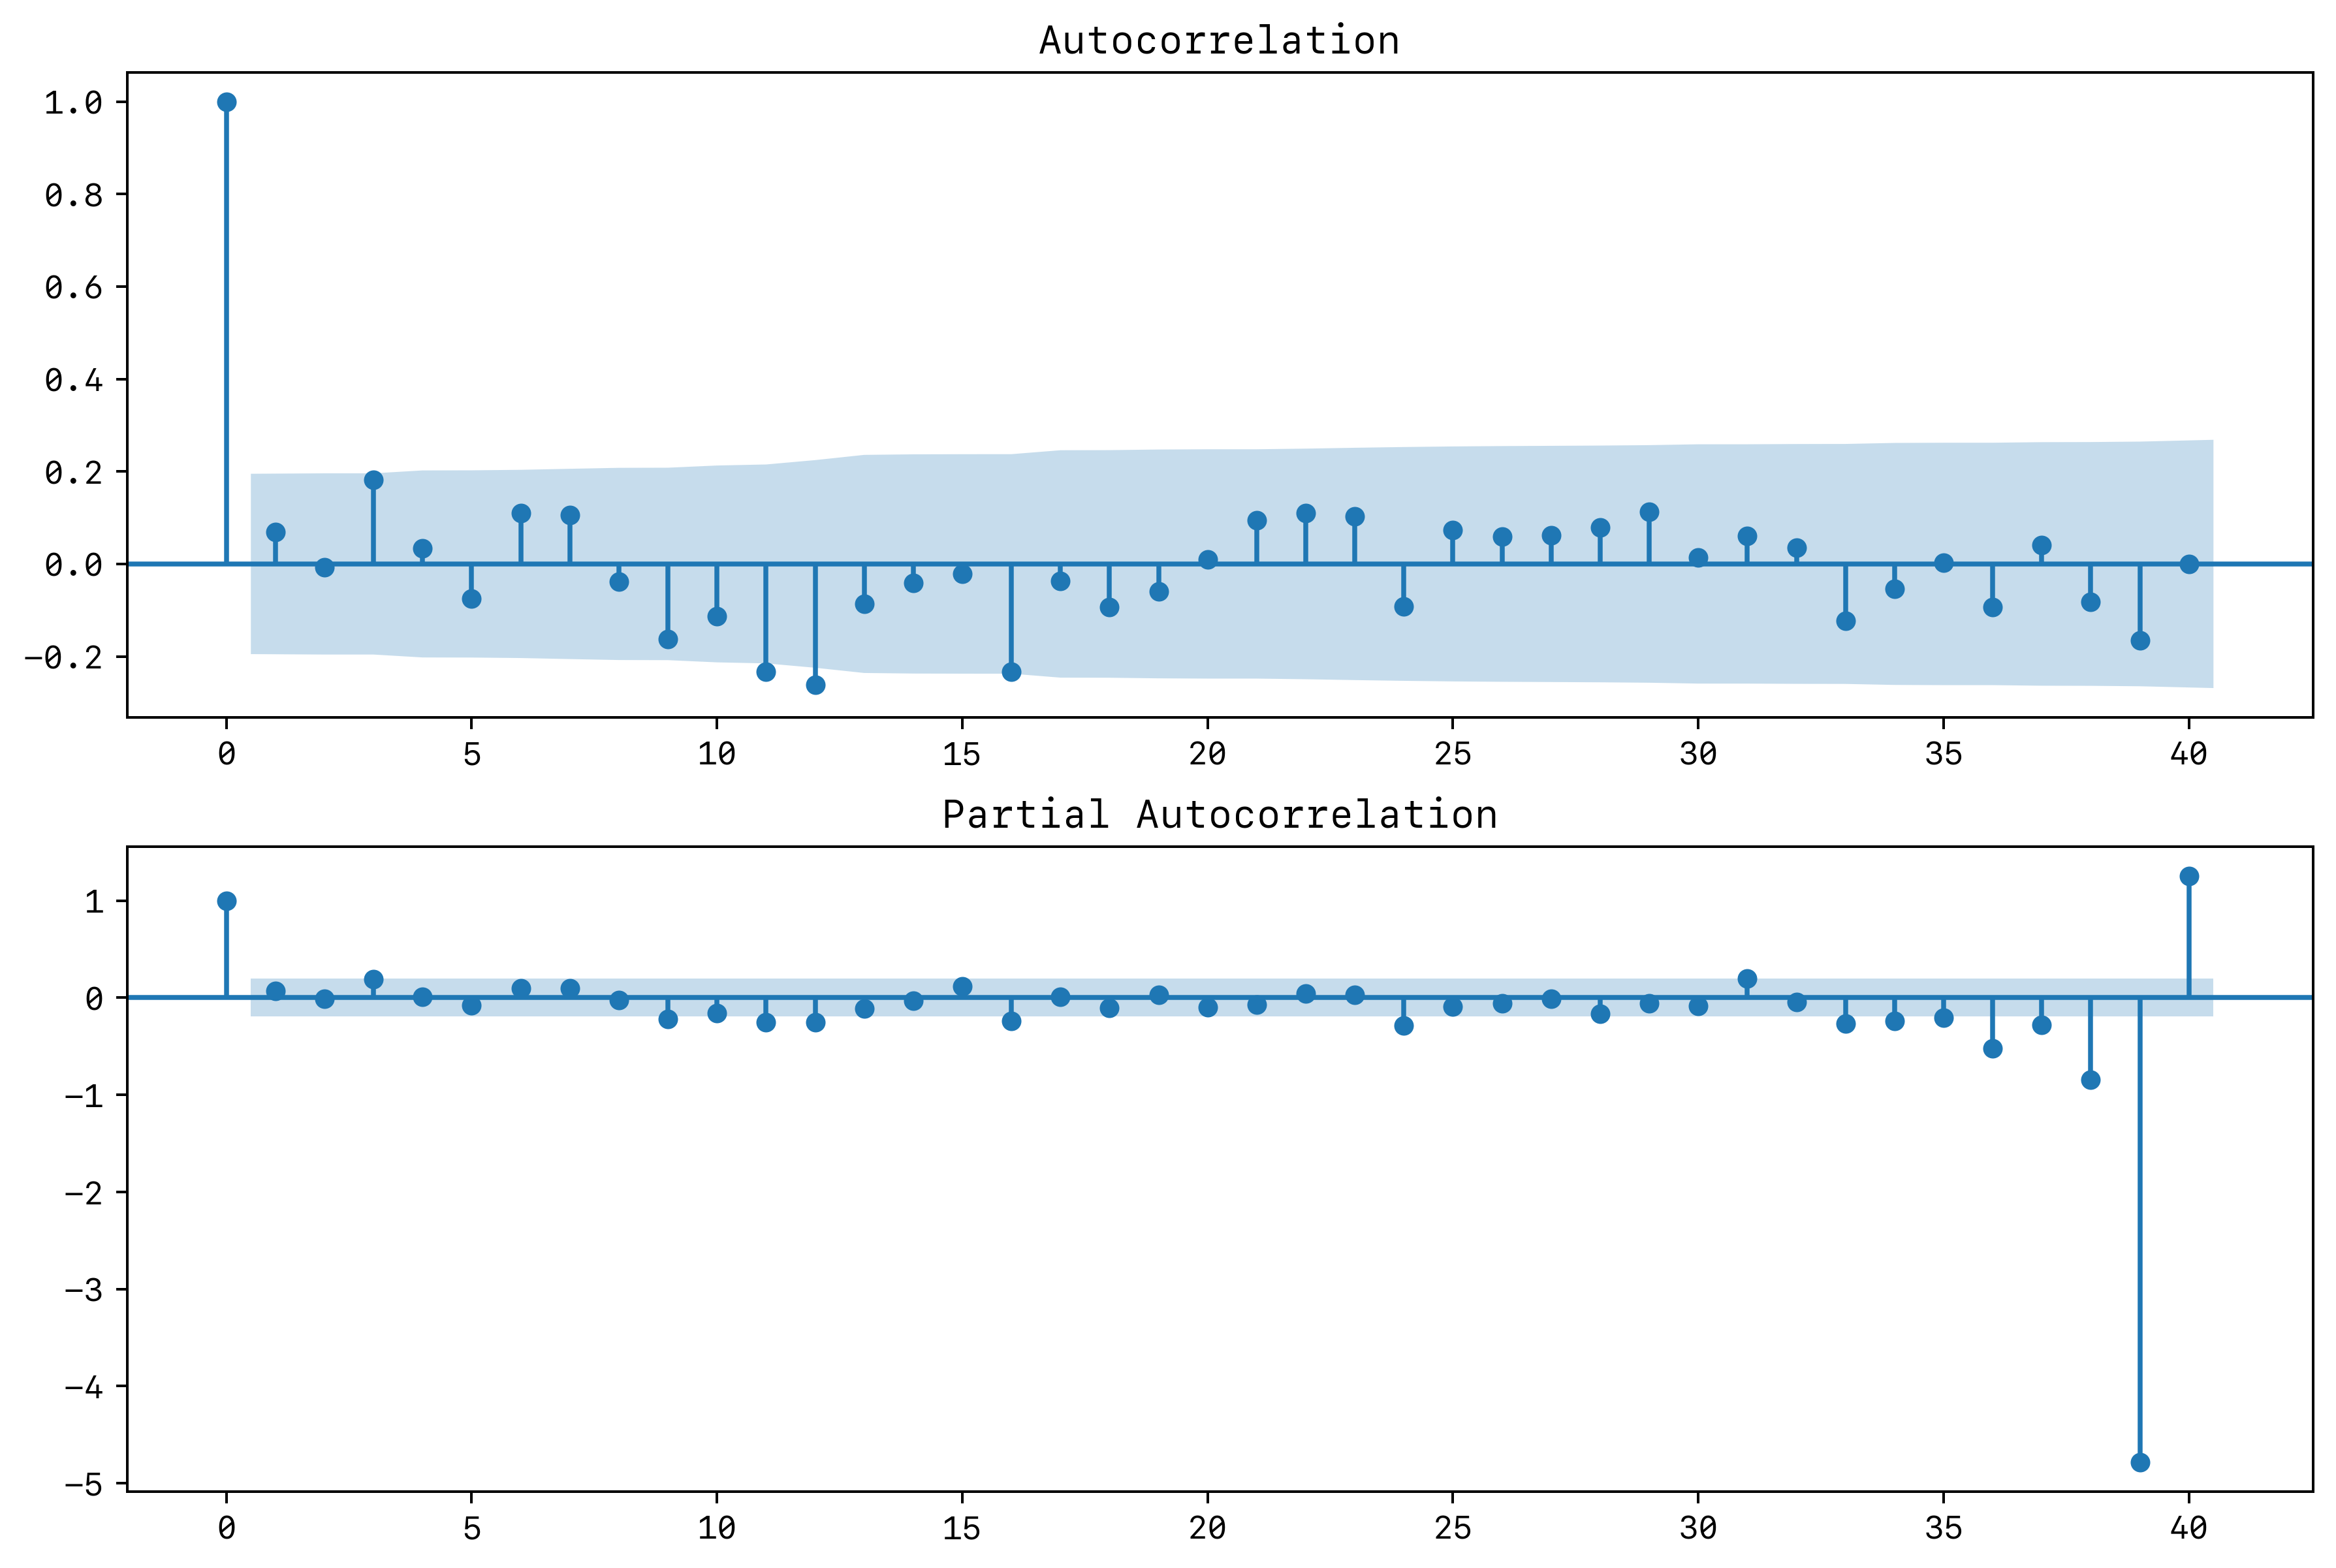

In [16]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['seasonal_first_difference'].iloc[13:], lags=40, ax=ax1)
#从13开始是因为做季节性差分时window是12
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['seasonal_first_difference'].iloc[13:], lags=40, ax=ax2)

需要制作的模型参数为(0,1,0)x(1,1,1,12)

In [17]:
mod = sm.tsa.statespace.SARIMAX(df['riders'], trend='n', order=(0, 1, 0), seasonal_order=(1, 1, 1, 12))
results = mod.fit()
print(results.summary())

/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43003D+00    |proj g|=  4.90513D-02

At iterate    5    f=  4.41232D+00    |proj g|=  4.76294D-03

At iterate   10    f=  4.39783D+00    |proj g|=  1.54382D-03

At iterate   15    f=  4.39780D+00    |proj g|=  7.11774D-04

At iterate   20    f=  4.39775D+00    |proj g|=  4.85880D-04

At iterate   25    f=  4.39773D+00    |proj g|=  3.03799D-04

At iterate   30    f=  4.39772D+00    |proj g|=  2.50611D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

预测值与真实值的比较

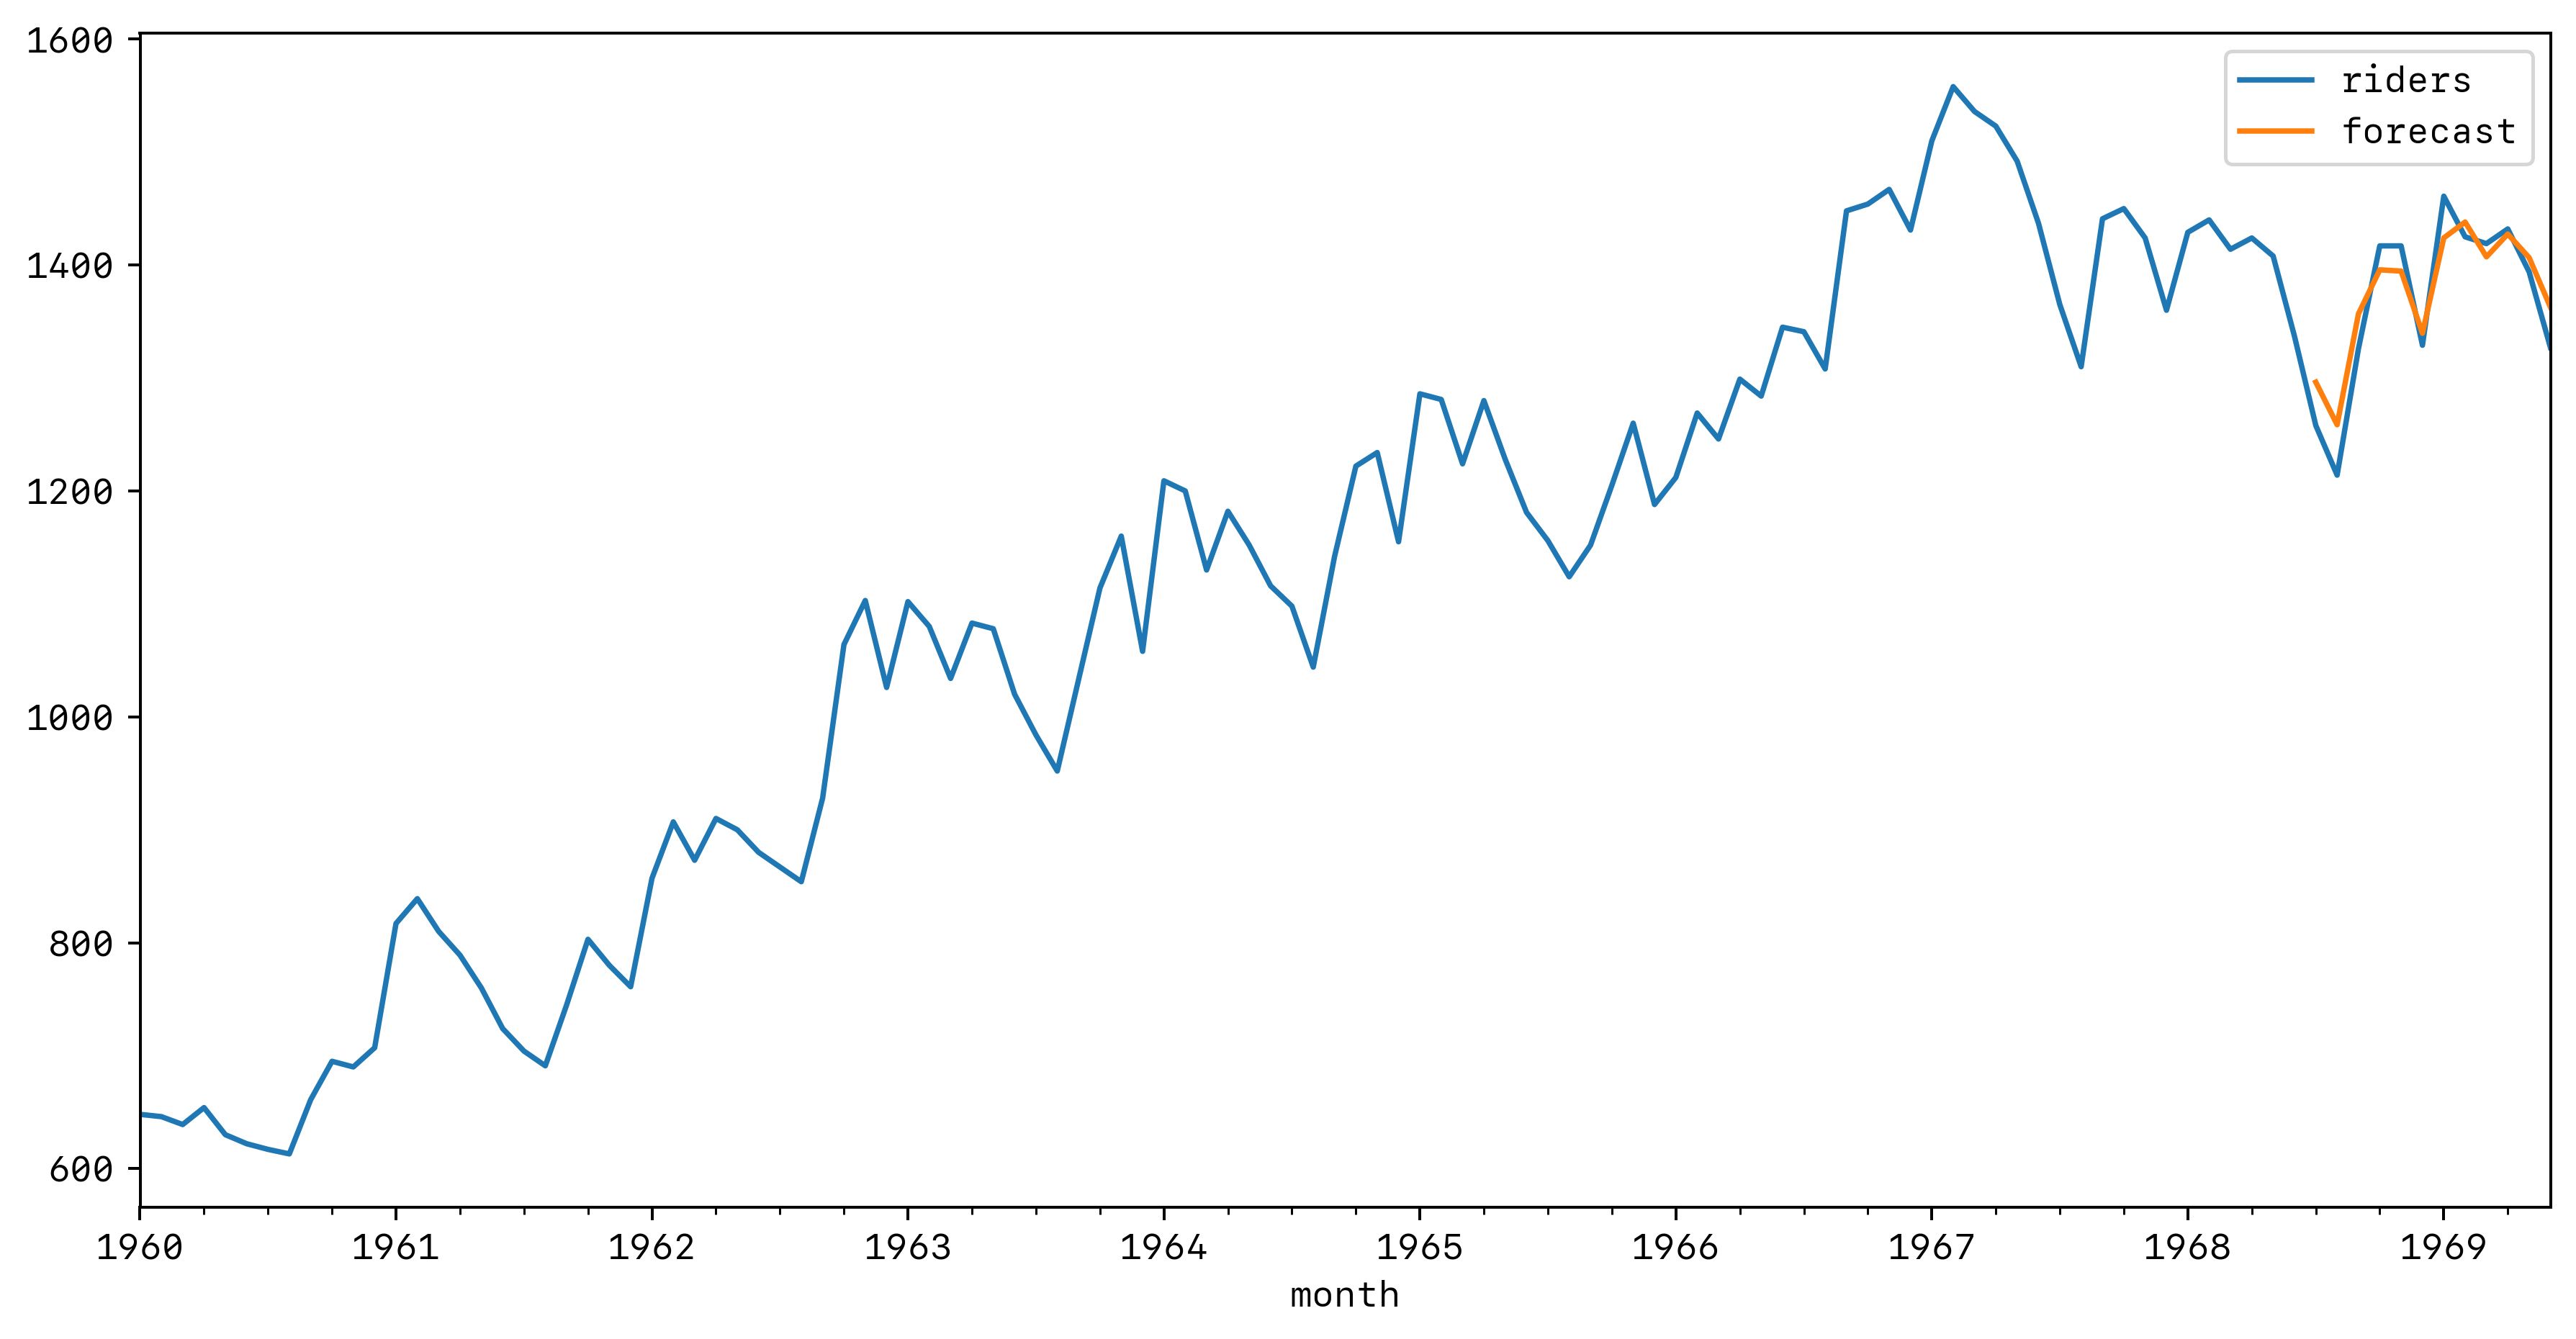

In [18]:
df['forecast'] = results.predict(start=102, end=114, dynamic=True)
df[['riders', 'forecast']].plot(figsize=(12, 6))

为了产生针对未来的预测值，我们加入新的时间

In [19]:
start = datetime.datetime.strptime("1969-07-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0, 12)]
future = pd.DataFrame(index=date_list, columns=df.columns)
df = pd.concat([df, future])

在新加入的时间上来预测未来值：

<AxesSubplot:>

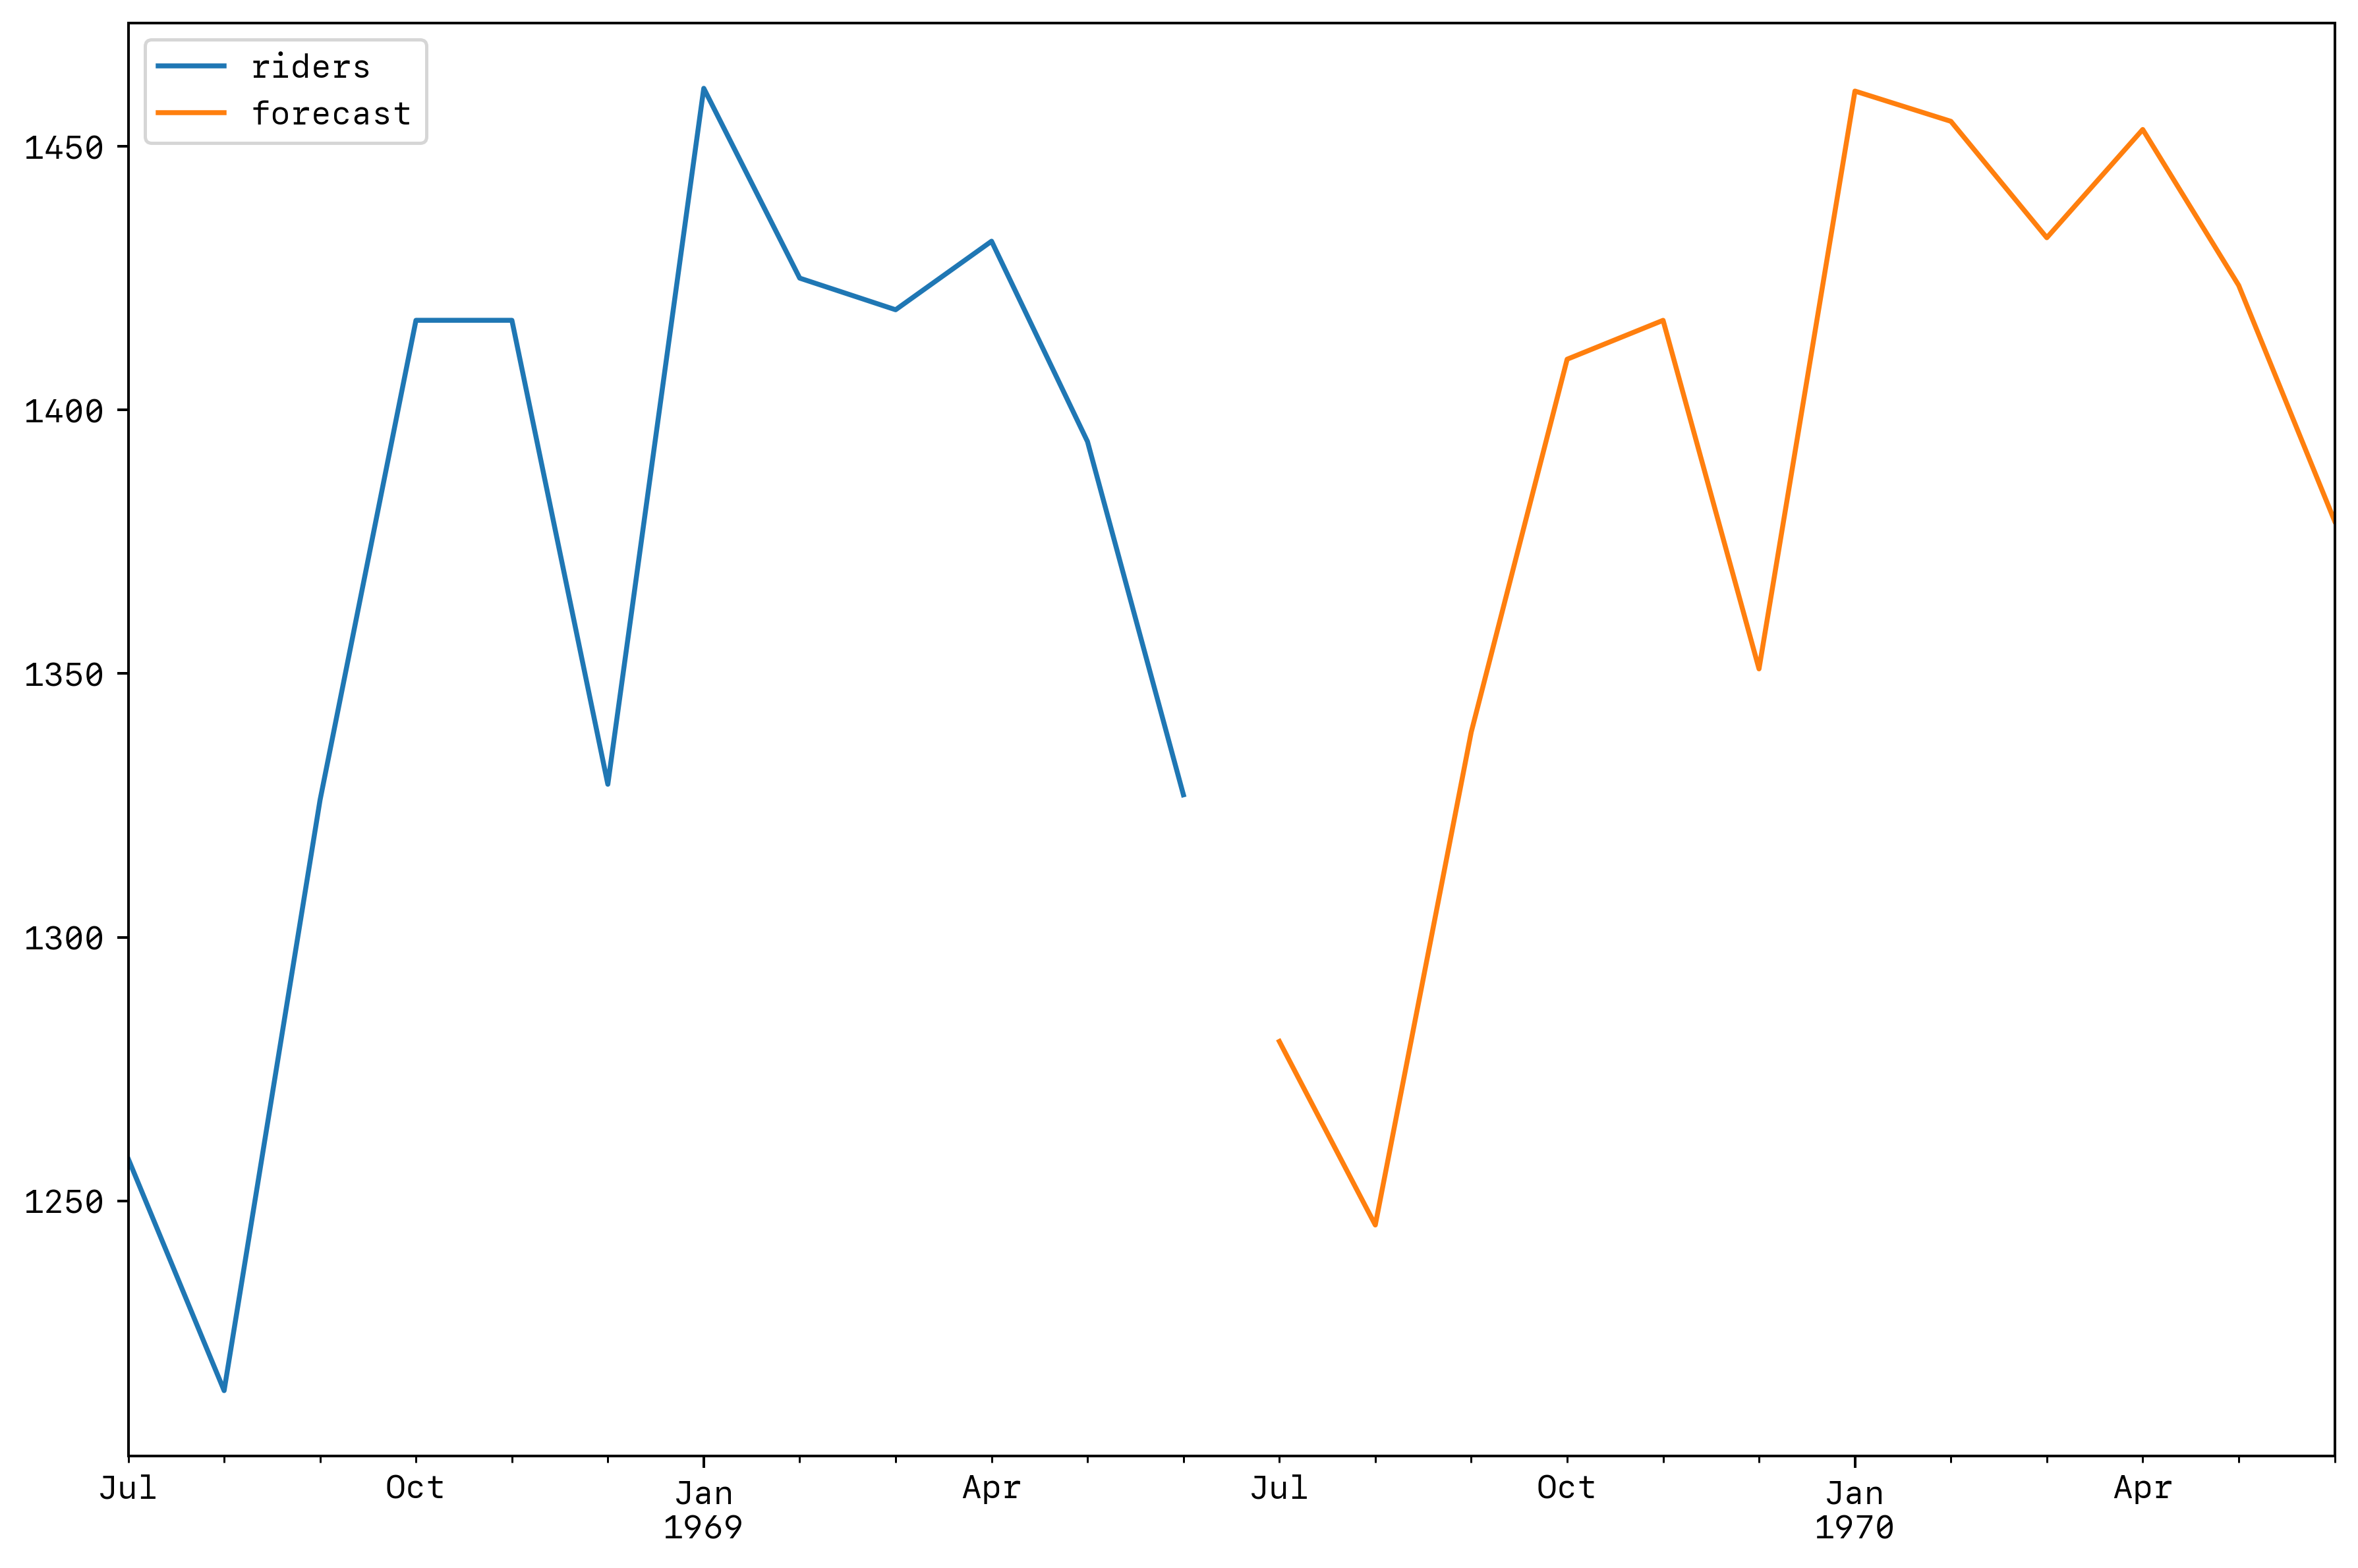

In [20]:
df['forecast'] = results.predict(start=114, end=125, dynamic=True)
df[['riders', 'forecast']][-24:].plot(figsize=(12, 8))